In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import json
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# About the Data
|      **Feature Name**      |               **Description**               |
|:--------------------------:|:-------------------------------------------:|
| person_age                 | Age                                         |
| person_income              | Annual Income                               |
| person_home_ownership      | Home ownership                              |
| person_emp_length          | Employment length (in years)                |
| loan_intent                | Loan intent                                 |
| loan_grade                 | Loan grade                                  |
| loan_amnt                  | Loan amount                                 |
| loan_int_rate              | Interest rate                               |
| loan_status                | Loan status (0 is non default 1 is default) |
| loan_percent_income        | Percent income                              |
| cb_person_default_on_file  | Historical default                          |
| cb_preson_cred_hist_length | Credit history length                       |

In [3]:
df = pd.read_csv("../data/raw/credit_risk_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

# Exploratory Data Analysis

## Univariate Analysis

### Target Proportion

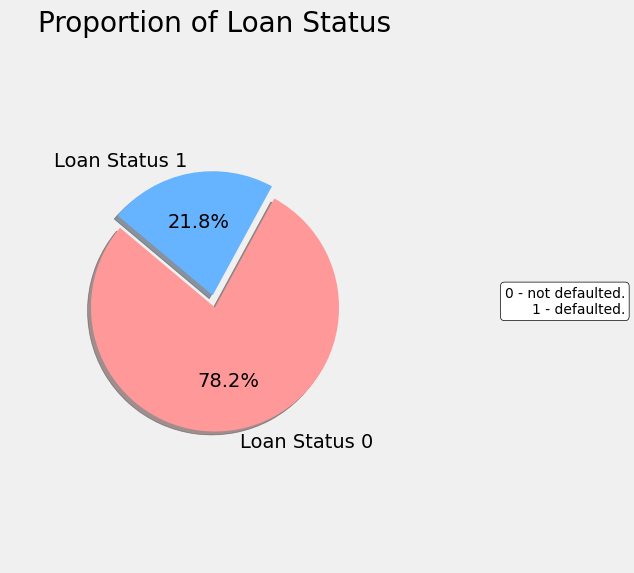

In [6]:
plt.style.use('fivethirtyeight')

# Count the values of "loan_status"
loan_status_counts = df["loan_status"].value_counts()

# Create labels and sizes for the pie chart
labels = ["Loan Status 0", "Loan Status 1"]
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Proportion of Loan Status")

# Add annotation
annotation = (
    "0 - not defaulted.\n"
    "1 - defaulted."
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords="axes fraction", ha="right", va="center", fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.show()


### Missing Values

In [125]:
# Calculate the count of missing values in each column
missing_values_count = df.isna().sum()
missing_values_count / len(df) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

### Numerical

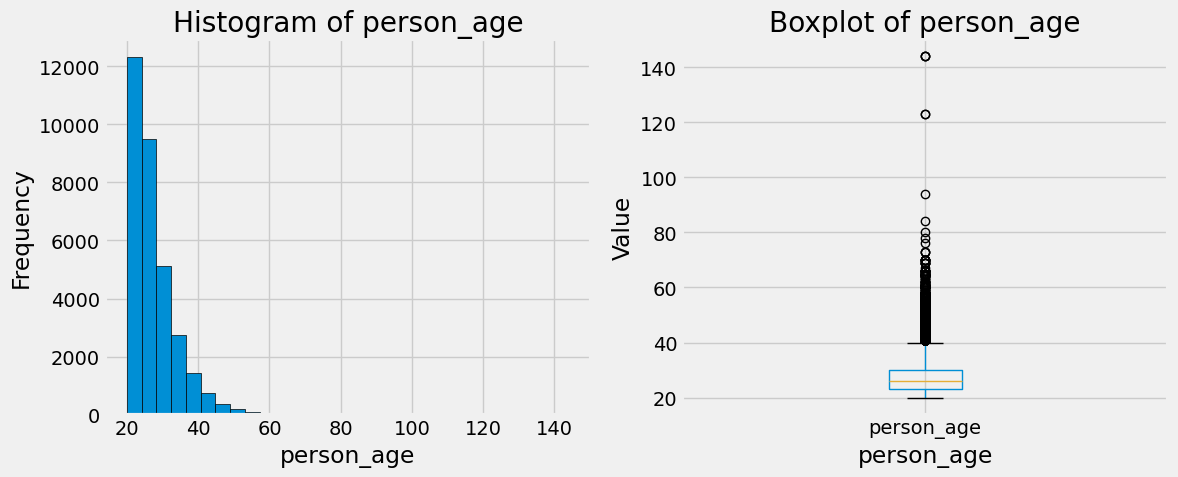

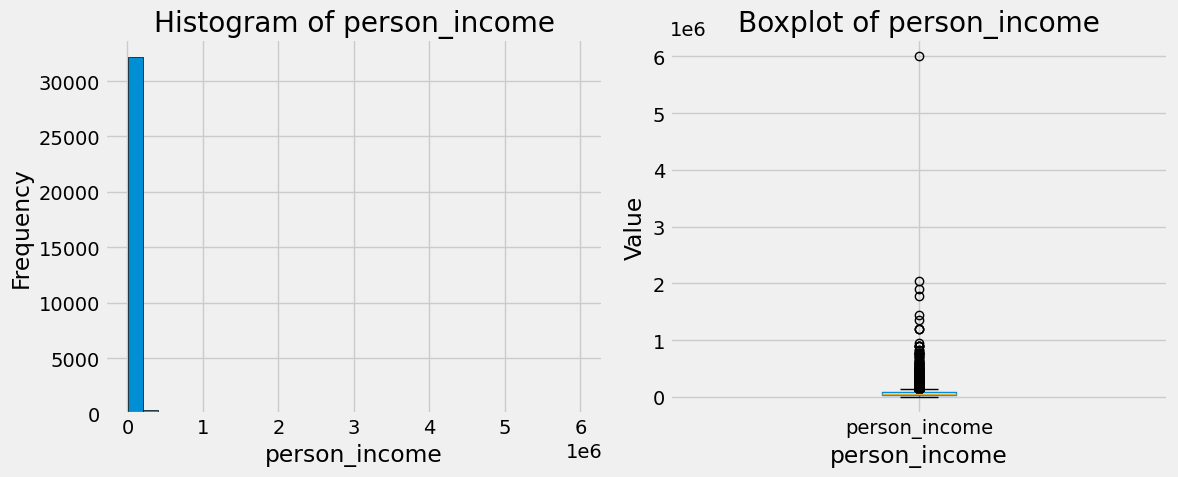

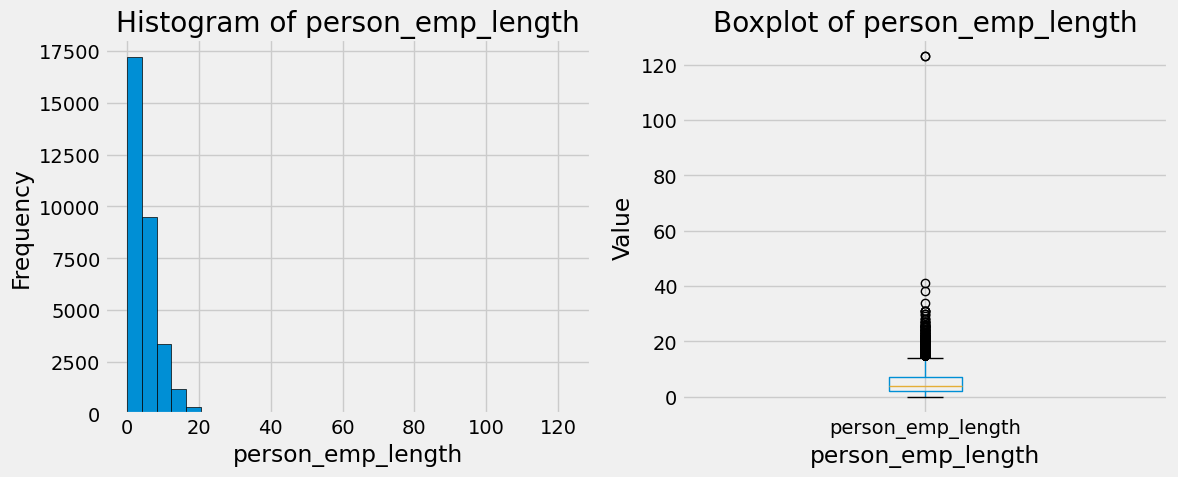

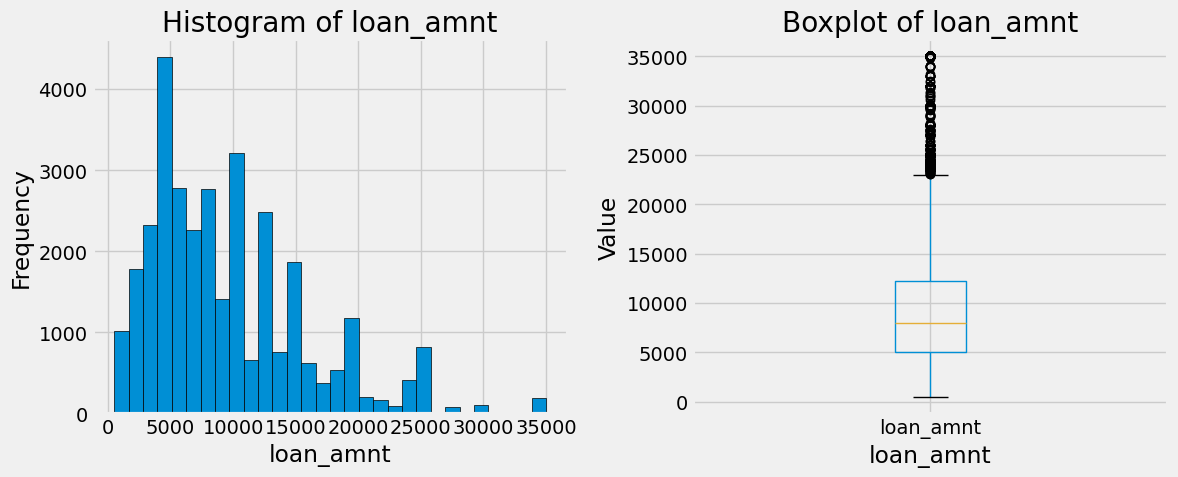

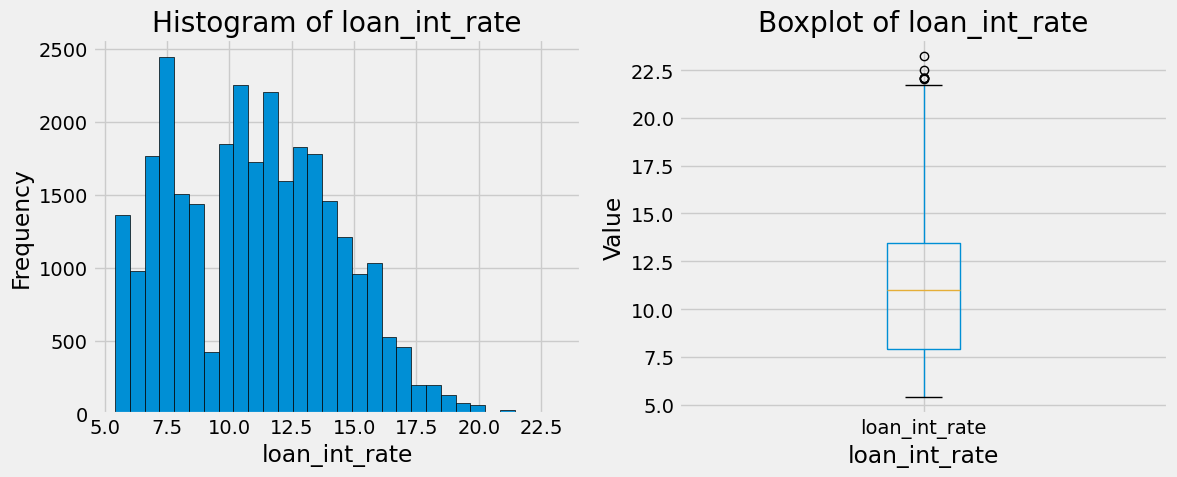

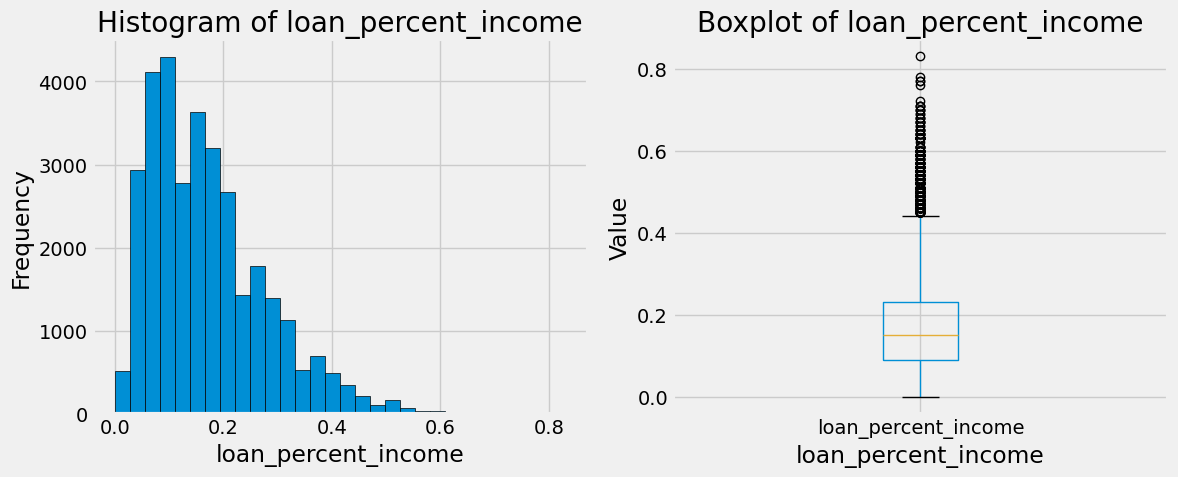

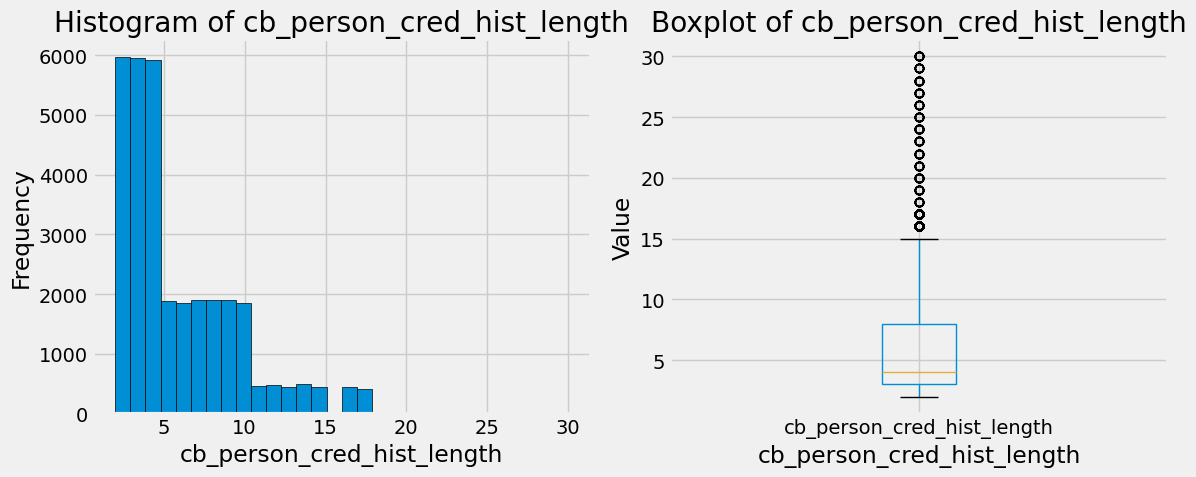

In [9]:
# Assuming df is your DataFrame
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

        # Histogram
        df[numerical_col].hist(ax=axes[0], bins=30, edgecolor='black')
        axes[0].set_title(f"Histogram of {numerical_col}")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        df.boxplot(column=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col}")
        axes[1].set_xlabel(numerical_col)
        axes[1].set_ylabel("Value")

        # Show plots
        plt.tight_layout()
        plt.show()

Suspected outliers inside of the `person_age` where the longest people who ever lived was 122 years old.

In [10]:
df[df["person_age"] > 120]

person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
32297         144        6000000              MORTGAGE               12.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
81        VENTURE          C       4800          13.57            0   
183     EDUCATION          B       6000          11.86            0   
575     EDUCATION          B      20400          10.25            0   
747       VENTURE          B      20000            NaN            0   
32297    PERSONAL          C       5000          12.73            0   

       loan_percent_income cb_person_default_on_file  \
81                    0.02                         N   
183                   0.03                         N   
575                   0.25                         N   
747                   0.26                         N   
32297                 0.00                         N   

       cb_person_cred_hist_length  
81                              3  
183                             2  
575                             3  
747                             4  
32297                          25

Looking at the data the numbers seems authentic. But in real life we might need to confirm about this.

### Categorical

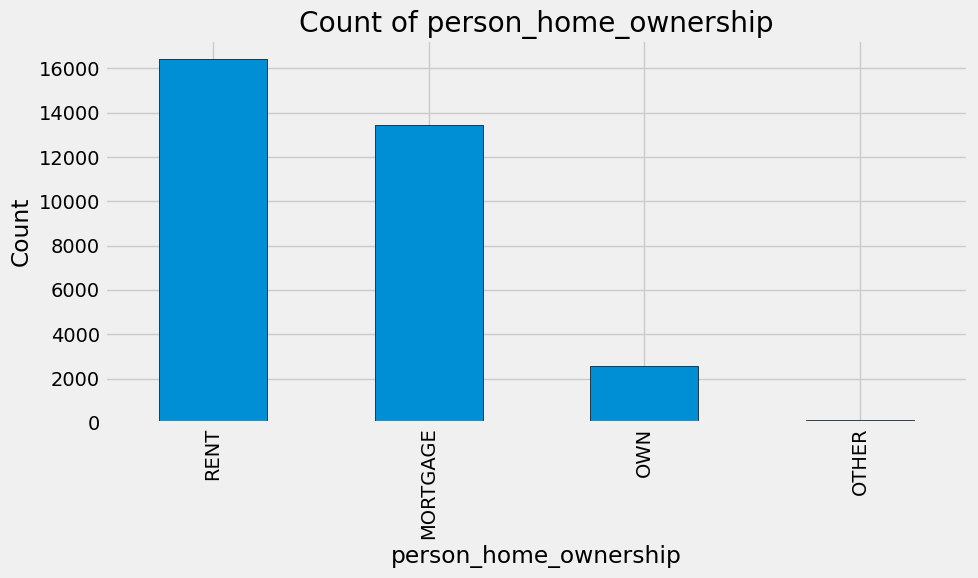

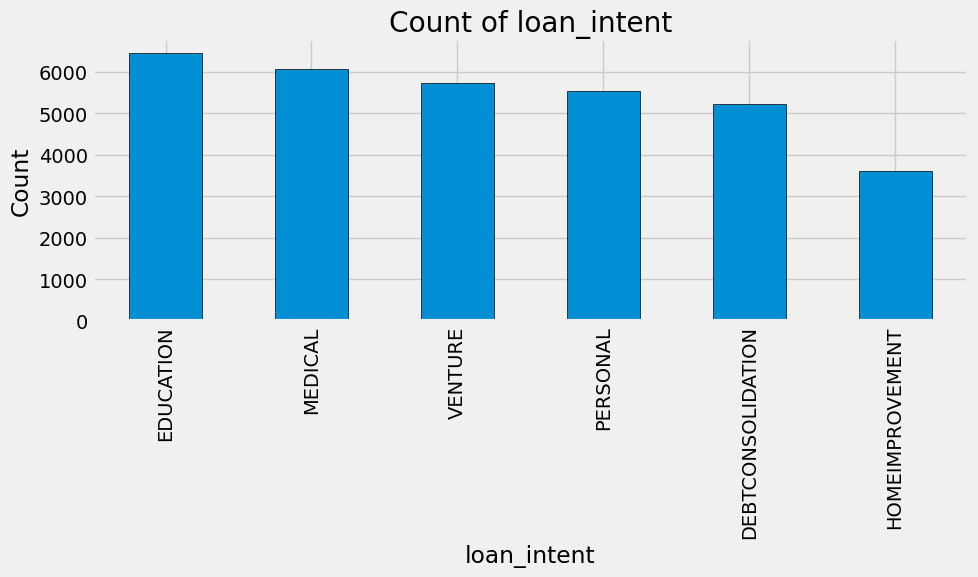

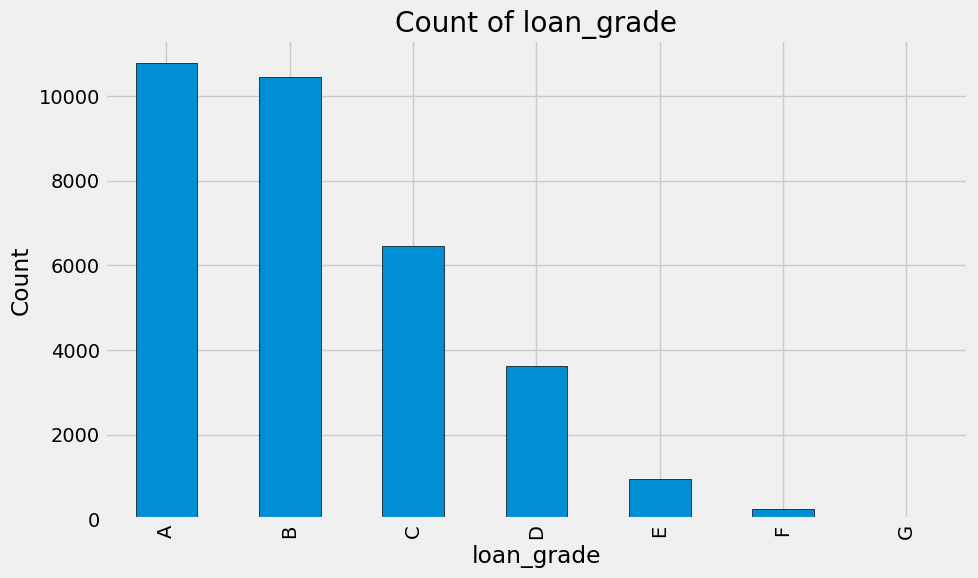

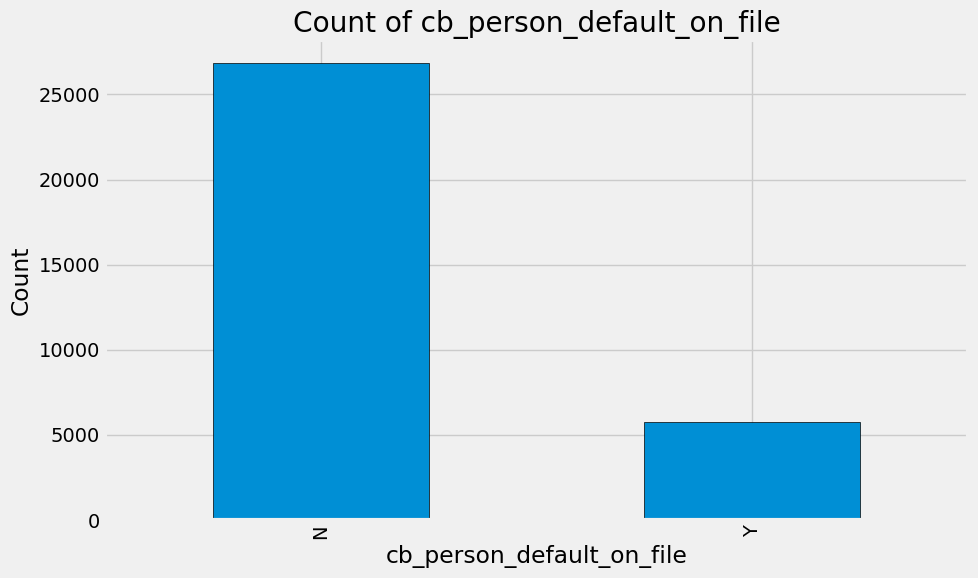

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_cols = df.select_dtypes("object").columns

plt.style.use('fivethirtyeight')
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot
    df[categorical_col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col}")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.show()


## Multivariate Analysis

### Numerical vs Target

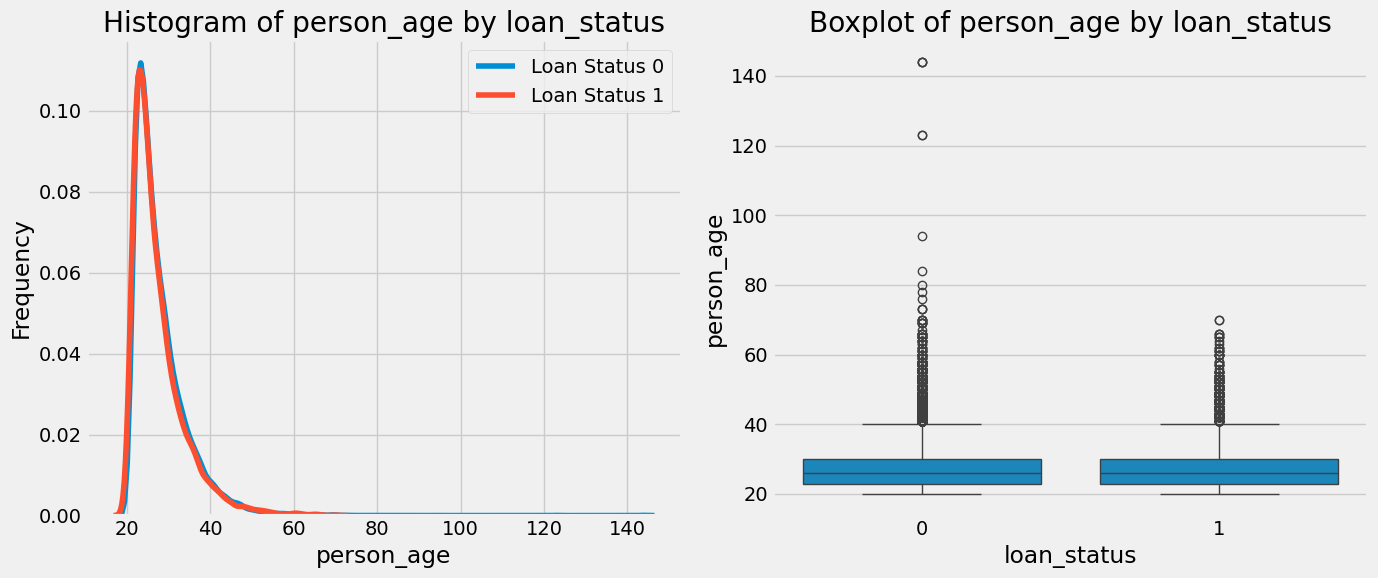

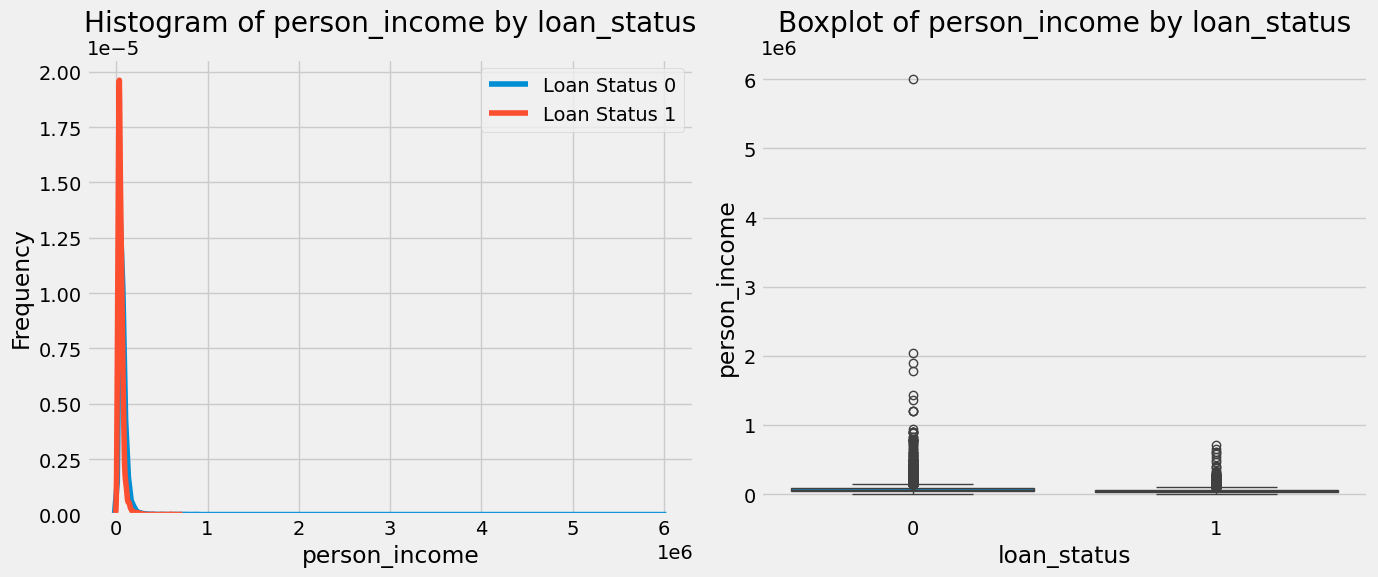

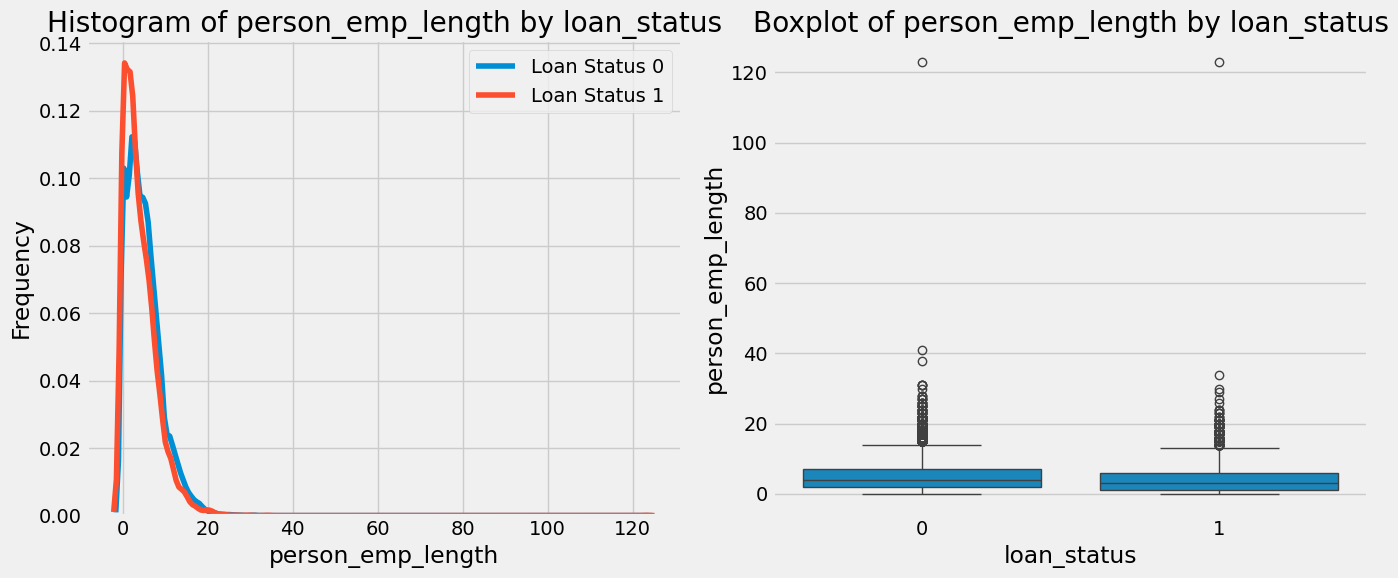

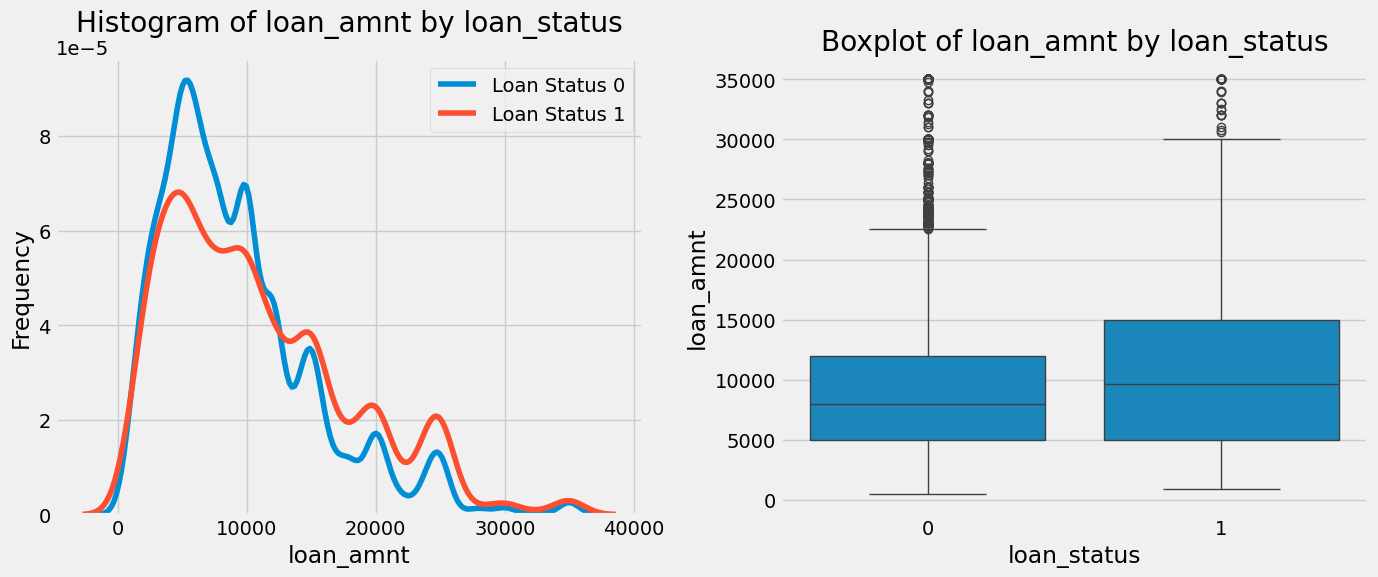

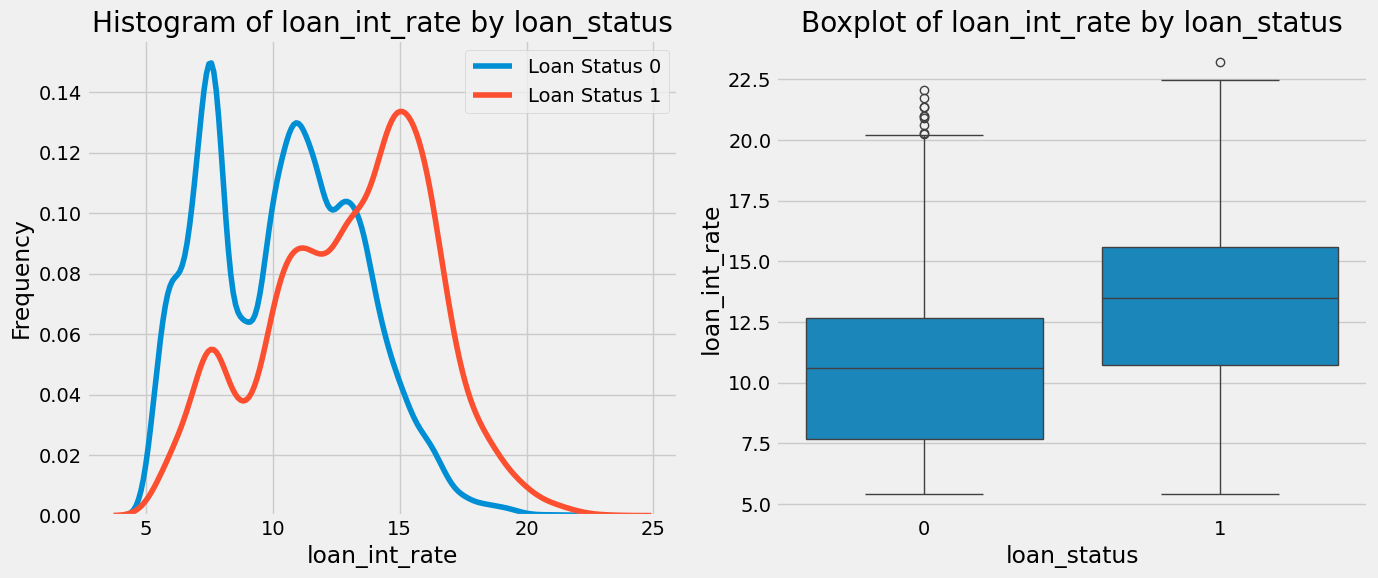

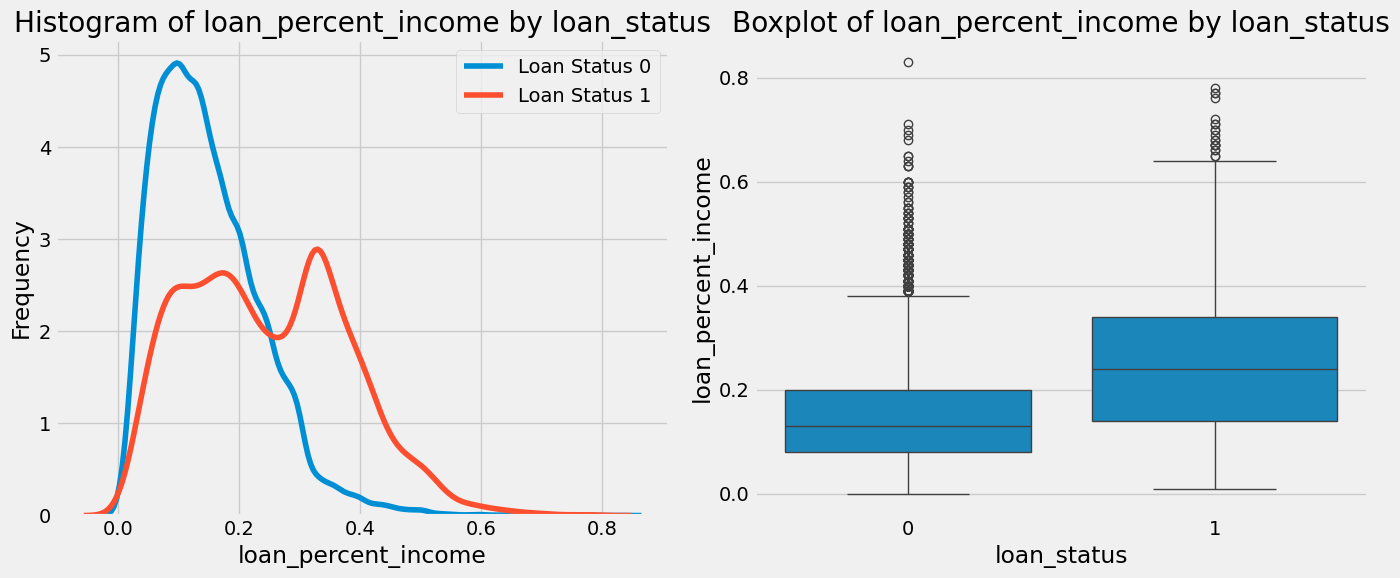

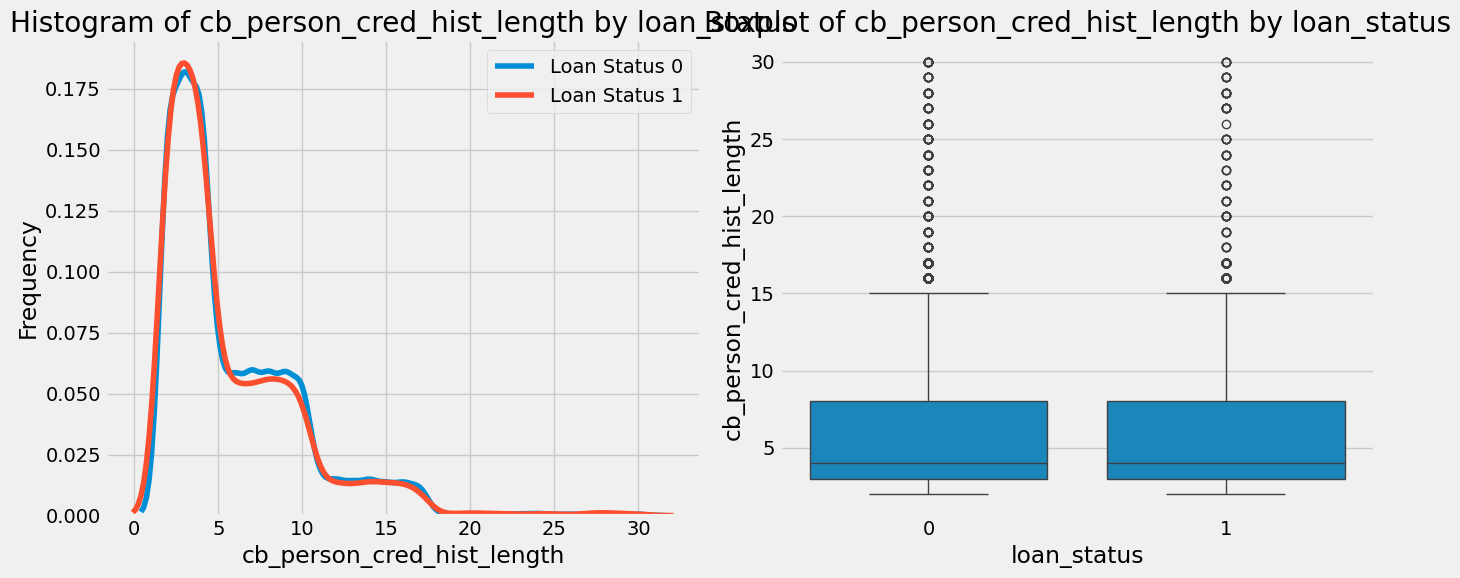

In [19]:
# Assuming df is your DataFrame and "loan_status" is the target variable
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns

        # Histogram with hue
        sns.kdeplot(data=df[df["loan_status"]==0], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 0", fill=False)
        sns.kdeplot(data=df[df["loan_status"]==1], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 1", fill=False)
        axes[0].set_title(f"Histogram of {numerical_col} by loan_status")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")
        axes[0].legend()

        # Boxplot with hue
        sns.boxplot(data=df, x='loan_status', y=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col} by loan_status")
        axes[1].set_xlabel('loan_status')
        axes[1].set_ylabel(numerical_col)

        # Show plots
        plt.tight_layout()
        plt.show()


2 features that shows higher chance loan status disapproval: `loan percent income` is high and `loan interest rate` are both high

### Categorical vs Target

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


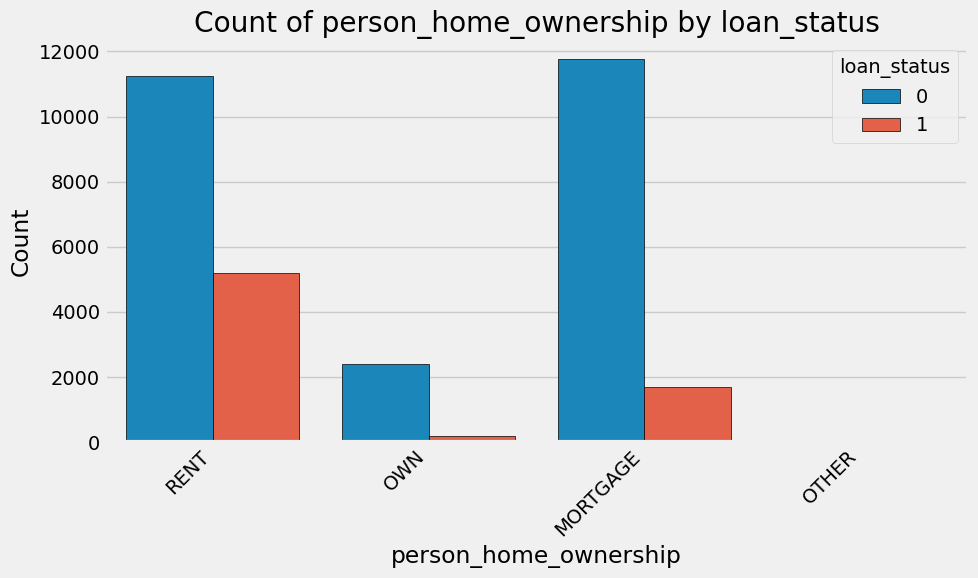

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


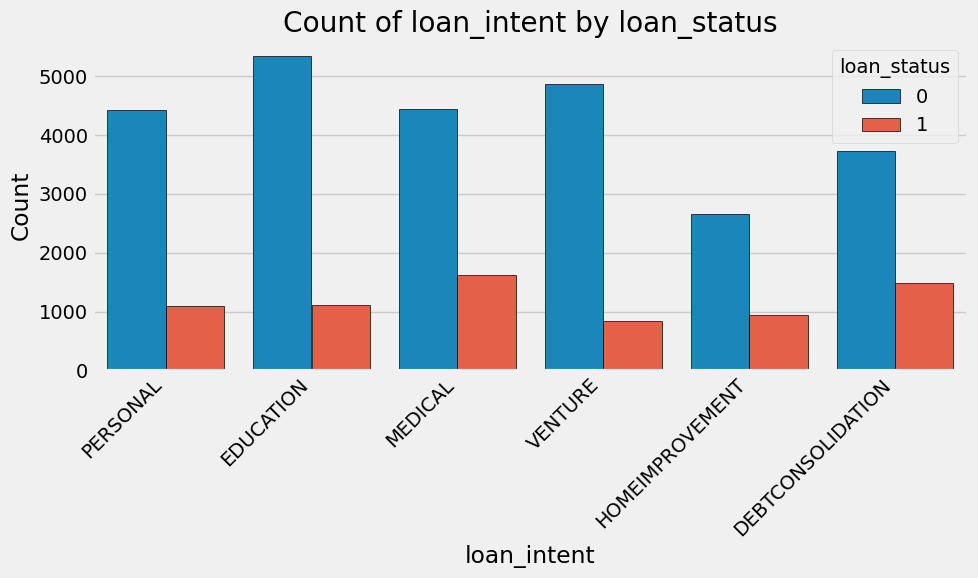

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


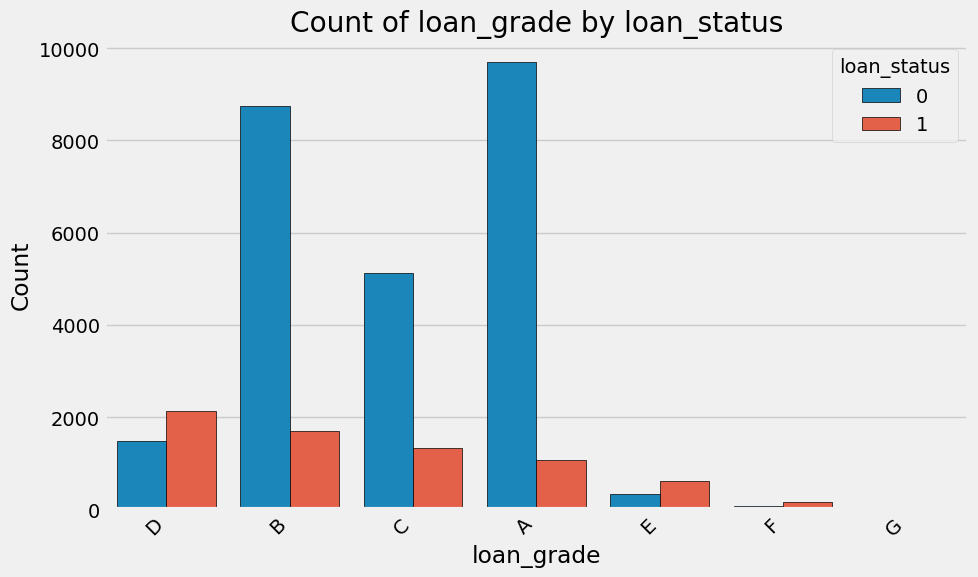

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


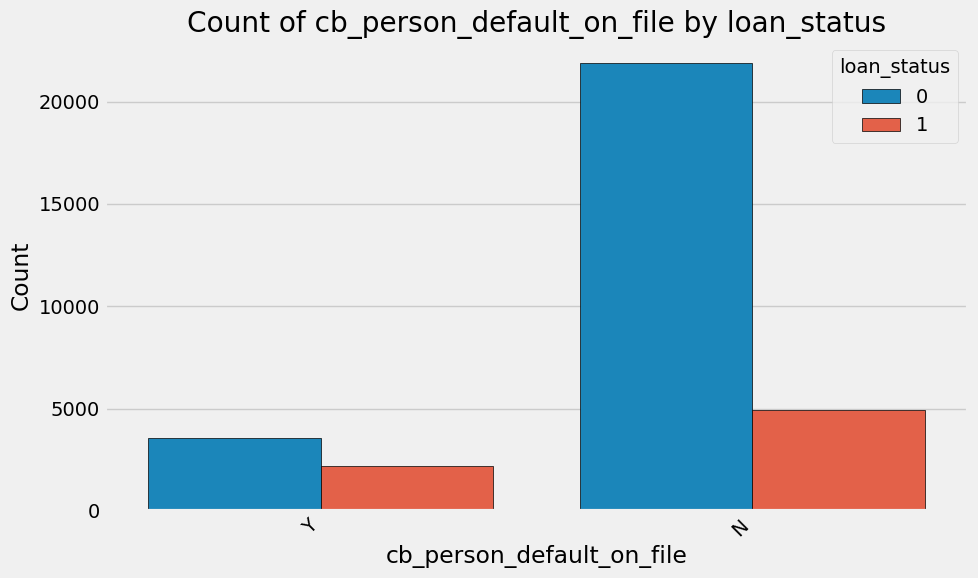

In [21]:
# Assuming df is your DataFrame and "loan_status" is the target variable
plt.style.use('fivethirtyeight')

categorical_cols = df.select_dtypes("object").columns
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot with hue
    sns.countplot(data=df, x=categorical_col, hue='loan_status', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col} by loan_status")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()


In [83]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby("cb_person_default_on_file")['loan_status'].value_counts(normalize=True).unstack(fill_value=0)

# Display the result
count_result

loan_status                       0         1
cb_person_default_on_file                    
N                          0.816068  0.183932
Y                          0.621932  0.378068

In [84]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby('person_home_ownership')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
count_result

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.360762  0.051871
OTHER                  0.002271  0.001013
OWN                    0.073386  0.005924
RENT                   0.345416  0.159357

In [85]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby('loan_grade')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
count_result

loan_status         0         1
loan_grade                     
A            0.297842  0.032933
B            0.268561  0.052208
C            0.157116  0.041098
D            0.045579  0.065713
E            0.010528  0.019060
F            0.002179  0.005218
G            0.000031  0.001934

1. Those who has history of default in the past has 37% probability of default.
2. Those who still **rent** has 16% probability of default.

## Multicollinearity

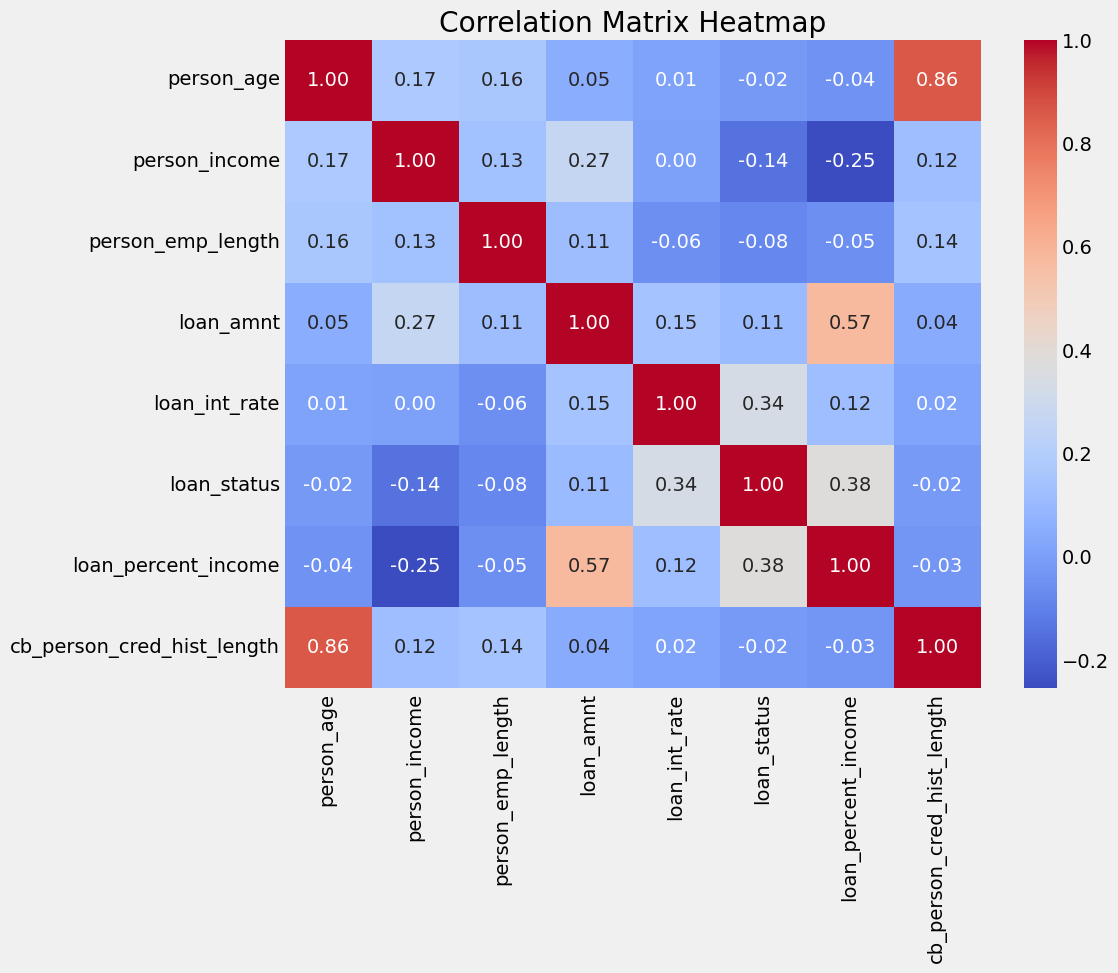

In [89]:
corr = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

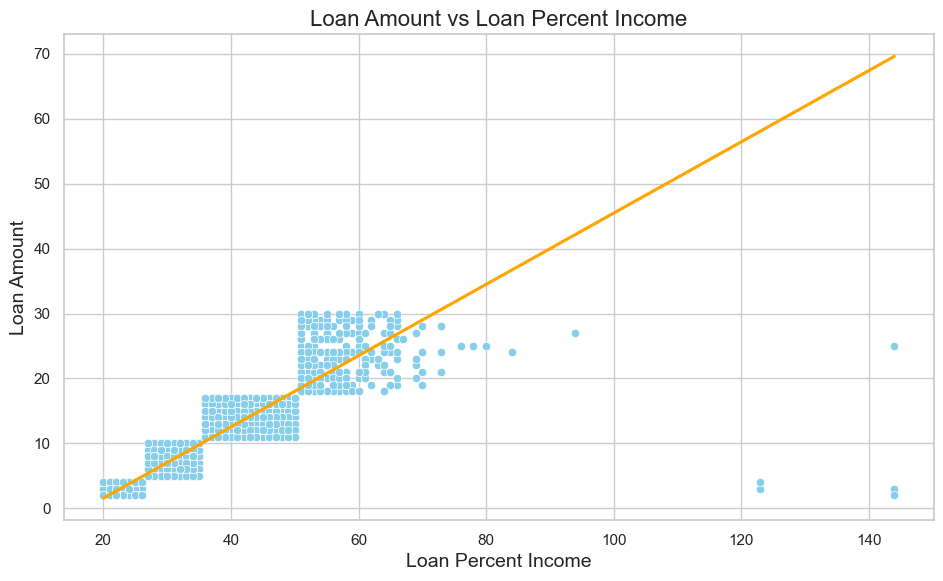

In [114]:
# Set style
sns.set(style="whitegrid")

# Create scatterplot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x="person_age", y="cb_person_cred_hist_length", data=df, color='skyblue')

# Add trend line
sns.regplot(x="person_age", y="cb_person_cred_hist_length", data=df, scatter=False, color='orange', ci=None)

# Add labels and title
plt.xlabel("Loan Percent Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount vs Loan Percent Income", fontsize=16)

# Add annotations or additional information if needed

# Show plot
plt.show()

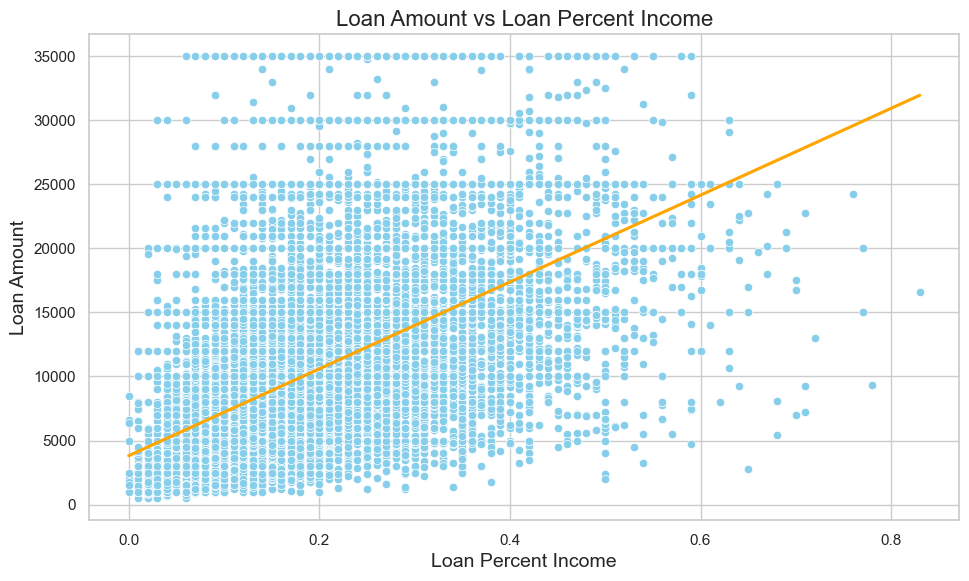

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create scatterplot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x="loan_percent_income", y="loan_amnt", data=df, color='skyblue')

# Add trend line
sns.regplot(x="loan_percent_income", y="loan_amnt", data=df, scatter=False, color='orange', ci=None)

# Add labels and title
plt.xlabel("Loan Percent Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount vs Loan Percent Income", fontsize=16)

# Add annotations or additional information if needed

# Show plot
plt.show()


# WOE and IV

## Data Splitting

In [4]:
# split data betweem train and text
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## 1. Perform Binning on Categorical Variables

In [5]:
def create_binning(df: pd.DataFrame, predictor_label: str, num_of_bins: int) -> pd.DataFrame:
    df[predictor_label] = pd.qcut(
        df[predictor_label],
        q = num_of_bins, 
        duplicates="drop"
    )
    return df

numerical_cols =  [col for col in train.select_dtypes("number") if col != "loan_status"]
train_binned = train.copy()
for numerical_col in numerical_cols:
    train_binned = create_binning(
        df = train_binned,
        predictor_label = numerical_col,
        num_of_bins = 4
    )
display(train_binned.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [6]:
# Define columns with missing values
missing_columns = ['person_emp_length', 'loan_int_rate']

# Perform grouping for all columns
for column in missing_columns:

    # Add category 'Missing' to replace the missing values
    train_binned[column] = train_binned[column].cat.add_categories('Missing')

    # Replace missing values with category 'Missing'
    train_binned[column] = train_binned[column].fillna(value = 'Missing')

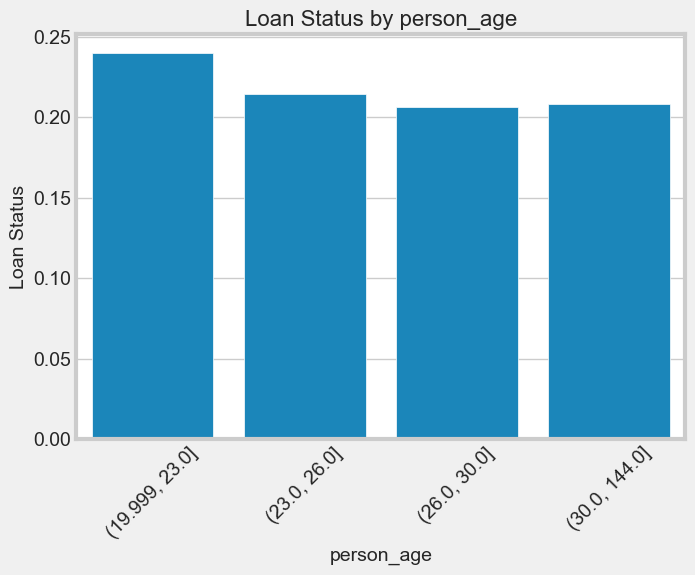

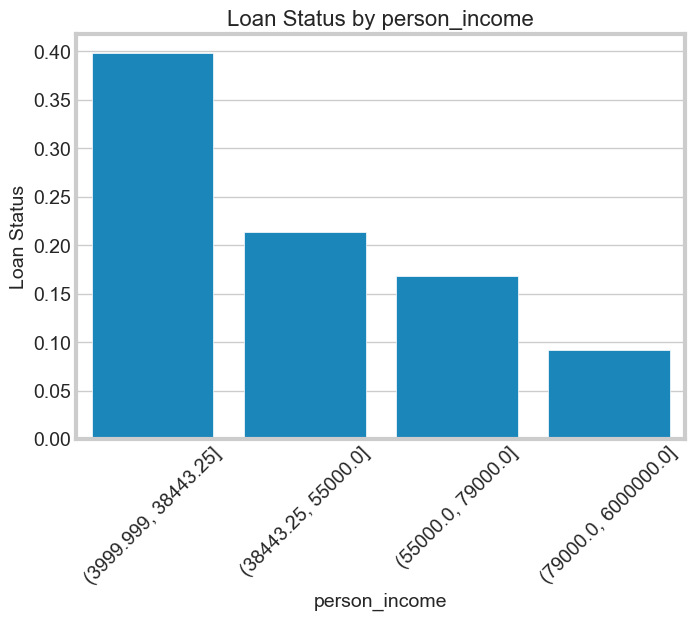

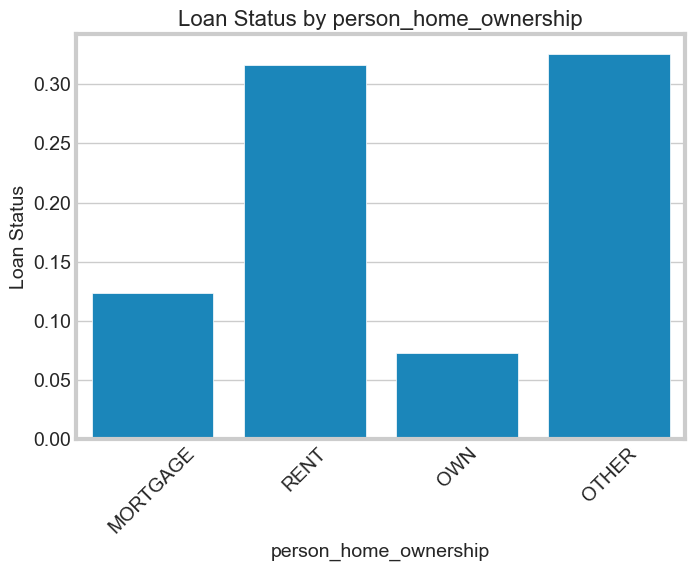

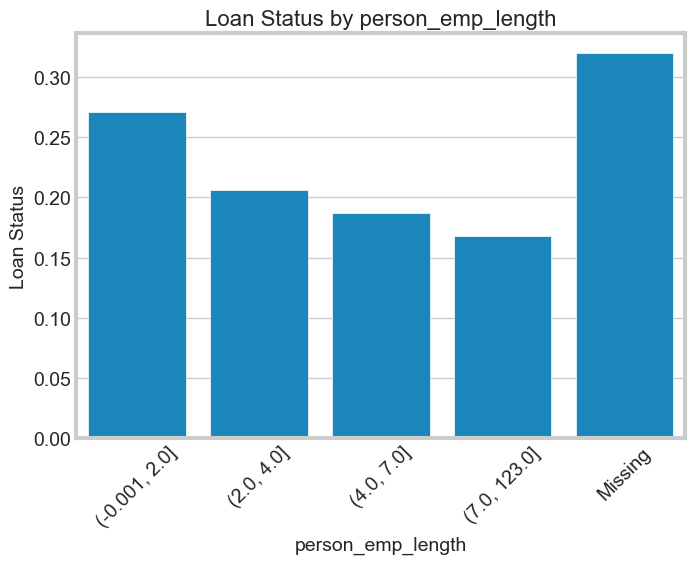

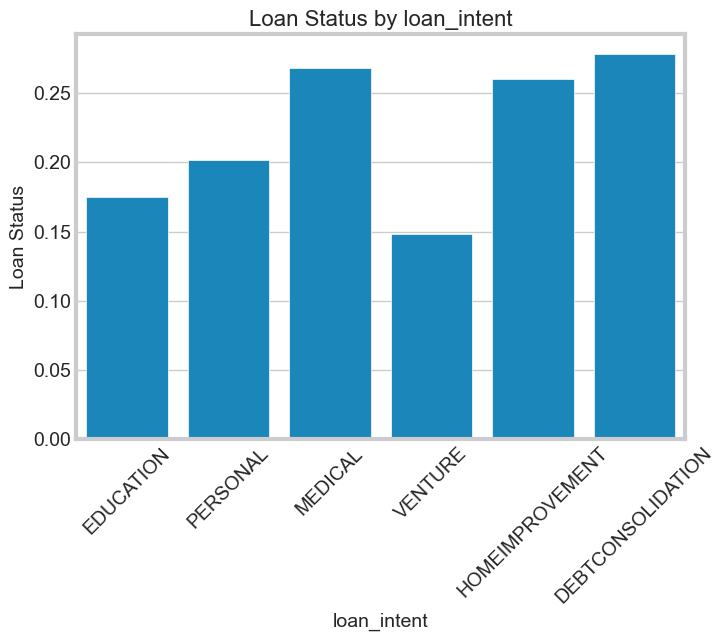

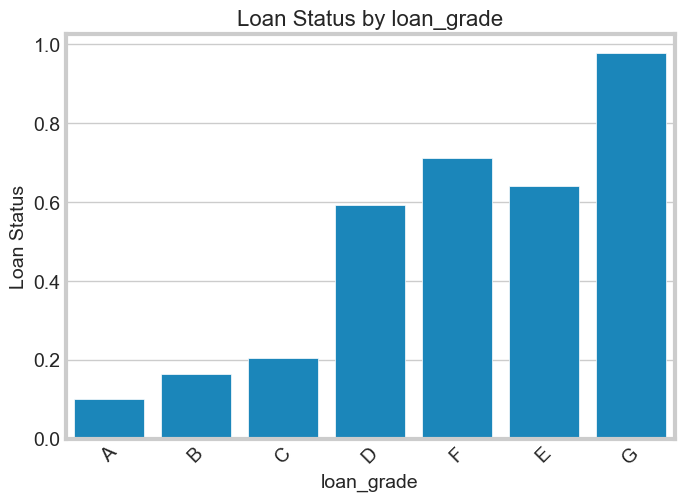

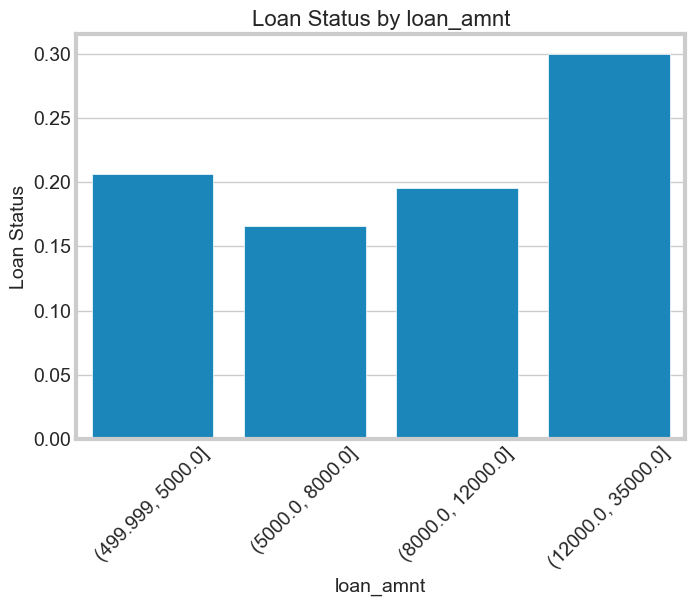

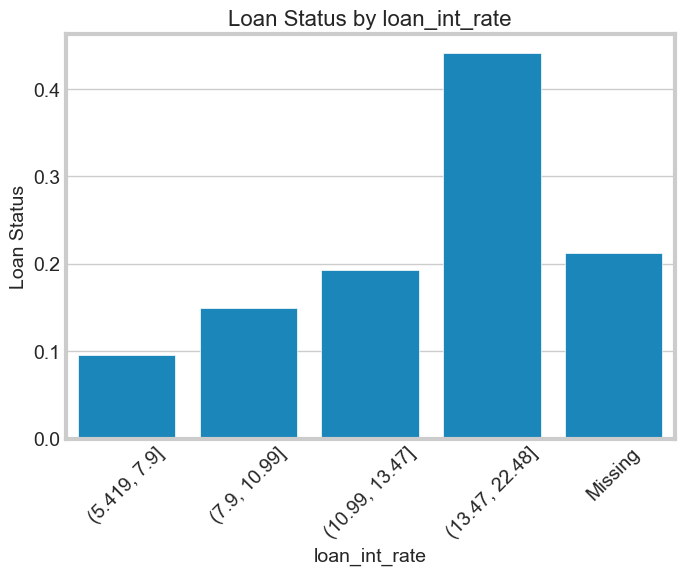

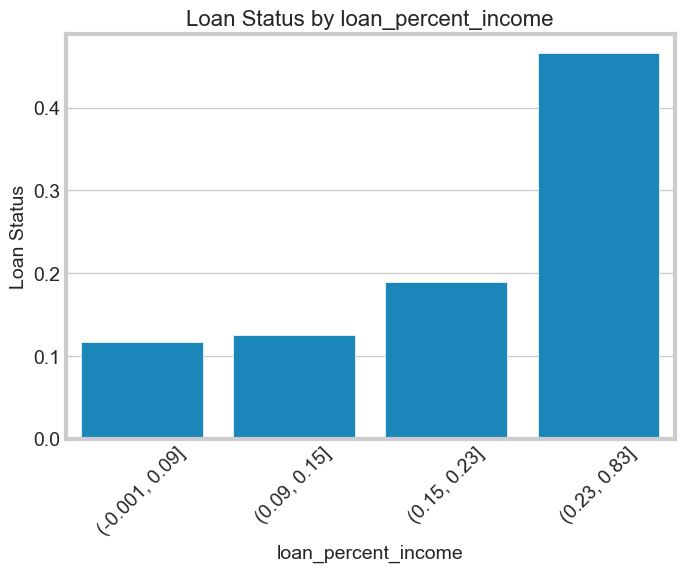

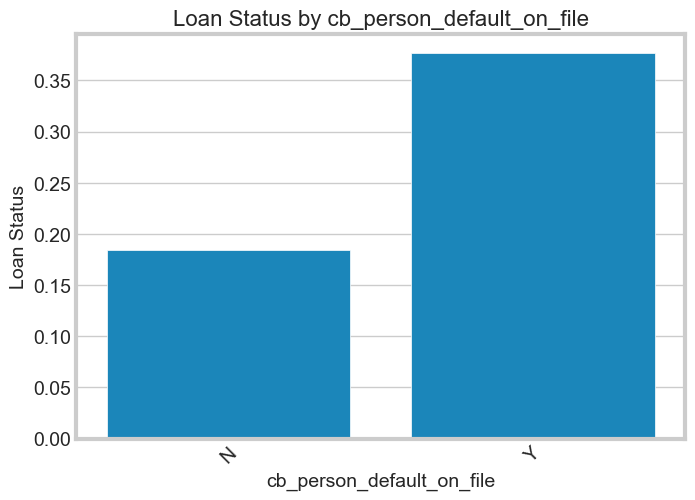

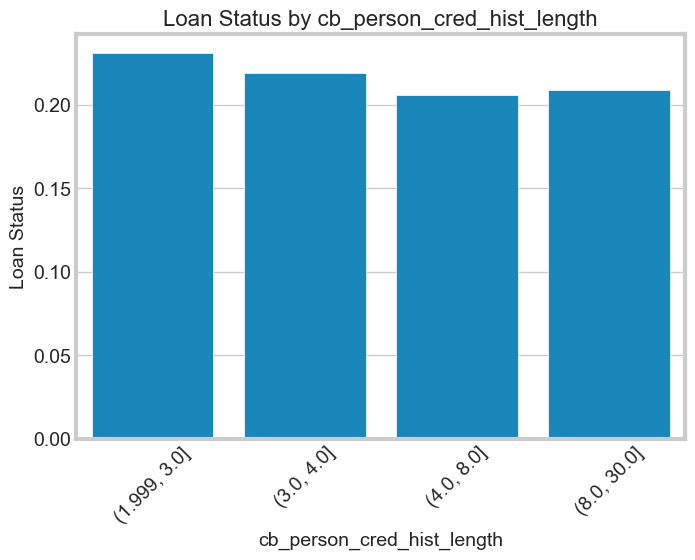

In [7]:
plt.style.use('fivethirtyeight')
for col in train_binned.columns:
    if col != "loan_status":
        # Set figure size and style
        plt.figure(figsize=(7, 5))
        sns.set_style("whitegrid")

        # Create bar plot with customized aesthetics
        sns.barplot(x=col, y="loan_status", data=train_binned, errorbar=None)

        # Add title and labels
        plt.title(f"Loan Status by {col}", fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Loan Status", fontsize=14)
        plt.xticks(rotation=45)

        # Show plot
        plt.show()

## 2. Calculate WoE and IV

In [8]:
# 1. Calculate the total amount of values inside each bin. Calculate the default and non default cases
crosstabs = {}
for col in train_binned.columns:
    if col != "loan_status":
        crosstabs[col] = pd.crosstab(train_binned[col], train_binned["loan_status"], margins=True)

In [9]:
# 2. Calculate the Weight of Evidence and Information Value
WOE_df = pd.DataFrame()
IV_df = pd.DataFrame()

for col, crosstab in crosstabs.items(): 
    crosstab["proportion_not_default"] = crosstab[0] / crosstab[0]["All"]
    crosstab["proportion_default"] = crosstab[1] / crosstab[1]["All"]
    crosstab["WoE"] = np.log(crosstab["proportion_not_default"]/ crosstab["proportion_default"])
    IV = np.sum((crosstab["proportion_not_default"]-crosstab["proportion_default"])*crosstab["WoE"])

    crosstab = crosstab.reset_index()
    temp_WOE_df = crosstab.iloc[:-1, [0, -1]].copy()
    temp_WOE_df.columns = ["Feature Value", "WoE"]
    temp_WOE_df.loc[:, "Feature"] = col
    WOE_df = pd.concat((WOE_df, temp_WOE_df), axis=0)
    IV_df = pd.concat((IV_df, pd.DataFrame({"Feature": [col], "IV": [IV]})))

WOE_df = WOE_df[["Feature", "Feature Value", "WoE"]]
WOE_df = WOE_df.reset_index(drop=True)
IV_df = IV_df.reset_index(drop=True)

gc.enable()
crosstab = None
crosstabs = None
gc.collect()

15368

In [10]:
# 3. Filter those with low value of IV
def interpret_iv(value):
    if value < 0.02:
        return "Not Predictive"
    elif 0.02 <= value and value < 0.1:
        return "Weak Predictive"
    elif 0.1 <= value and value < 0.3:
        return "Medium Predictive"
    elif 0.3 <= value and value < 0.5:
        return "Strong Predictive"
    else:
        return "Very Strong Predictive"

IV_df["Interpretation"] = IV_df["IV"].apply(lambda x: interpret_iv(x))
IV_df = IV_df.sort_values(by="IV", ascending=False)
IV_df

Feature        IV          Interpretation
5                   loan_grade  0.869018  Very Strong Predictive
8          loan_percent_income  0.609508  Very Strong Predictive
7                loan_int_rate  0.518770  Very Strong Predictive
1                person_income  0.436270       Strong Predictive
2        person_home_ownership  0.389711       Strong Predictive
9    cb_person_default_on_file  0.162480       Medium Predictive
4                  loan_intent  0.088686         Weak Predictive
6                    loan_amnt  0.079956         Weak Predictive
3            person_emp_length  0.067094         Weak Predictive
0                   person_age  0.006049          Not Predictive
10  cb_person_cred_hist_length  0.003787          Not Predictive

## 3. Plot WoE

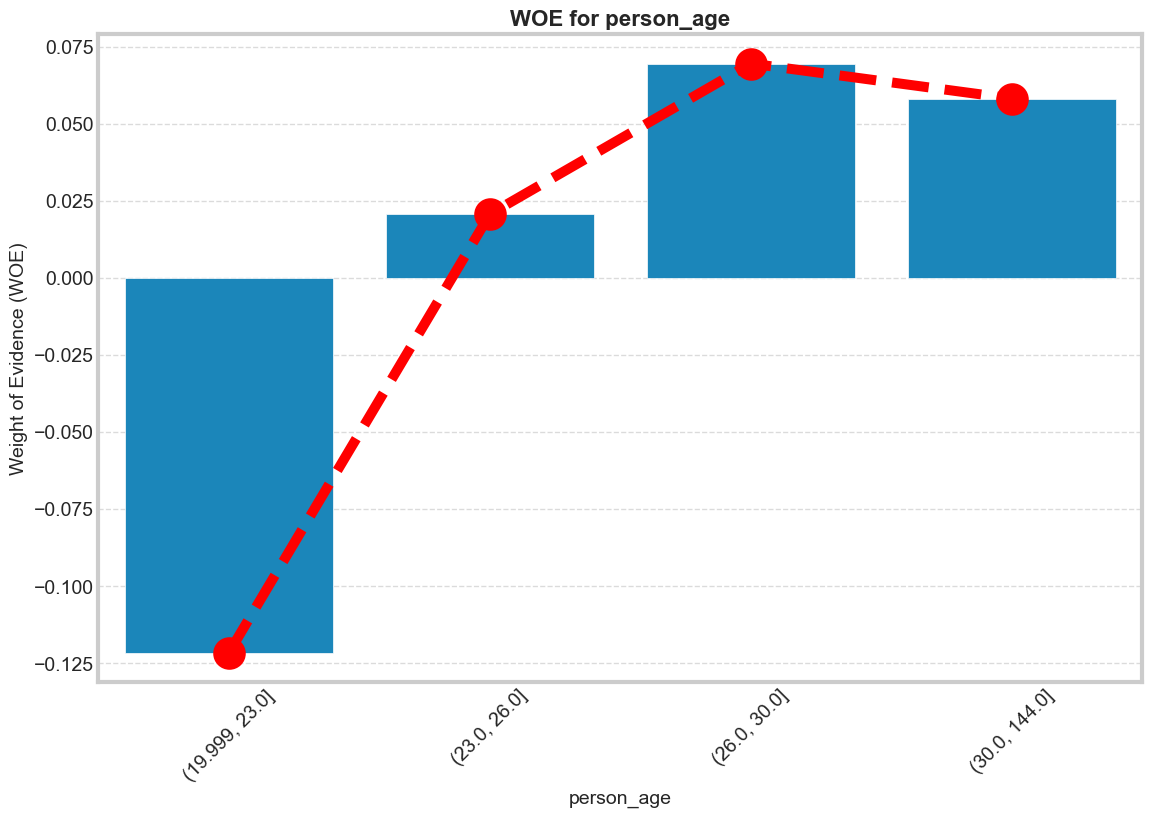

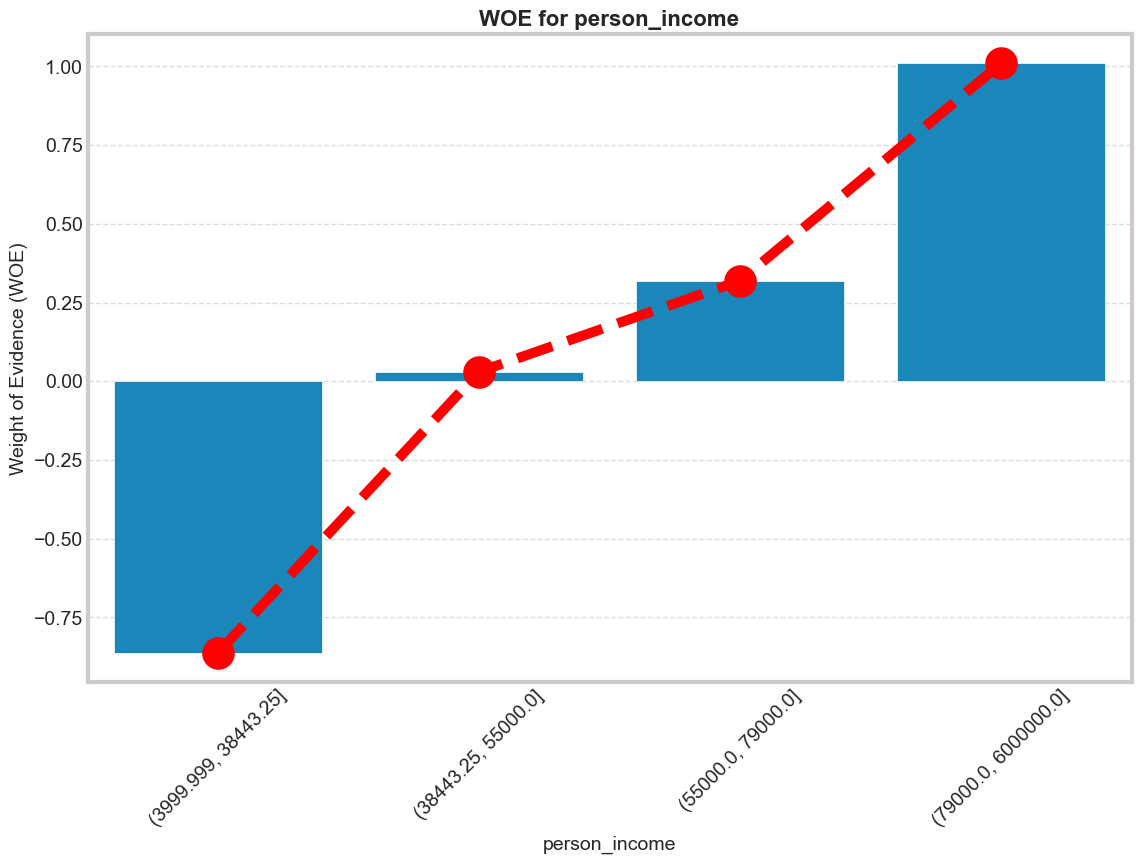

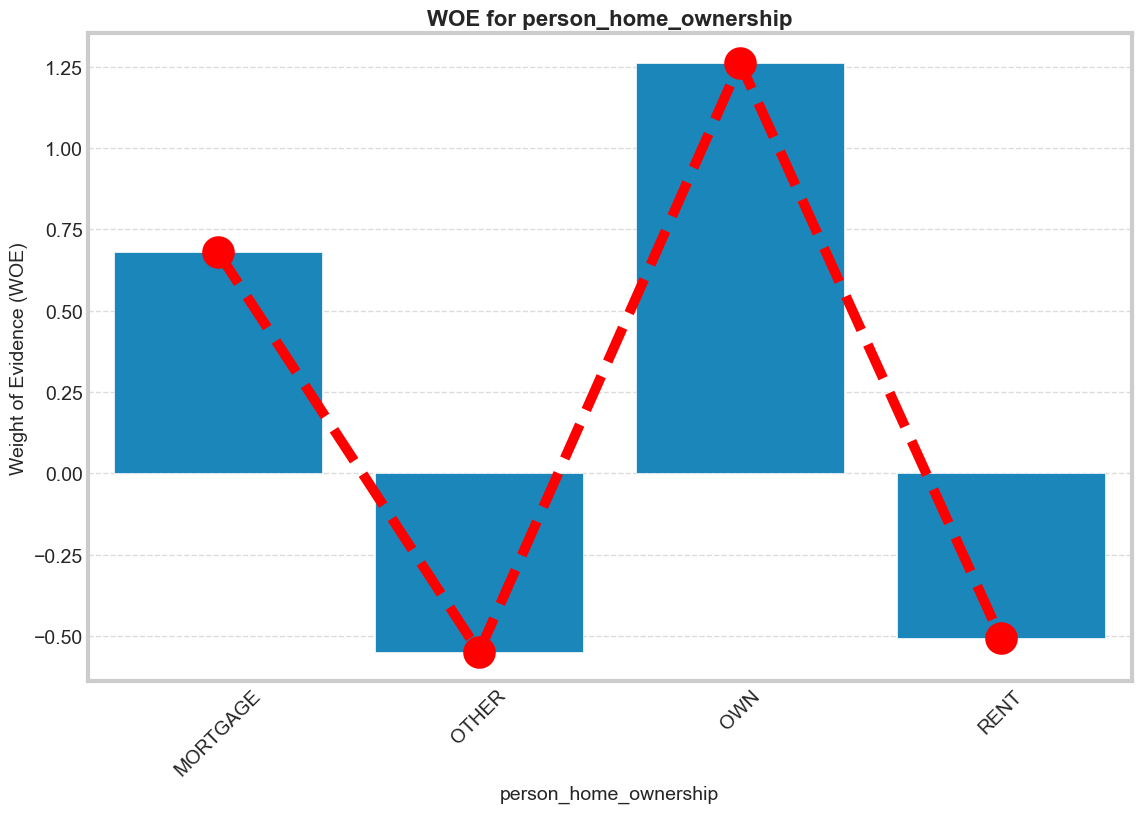

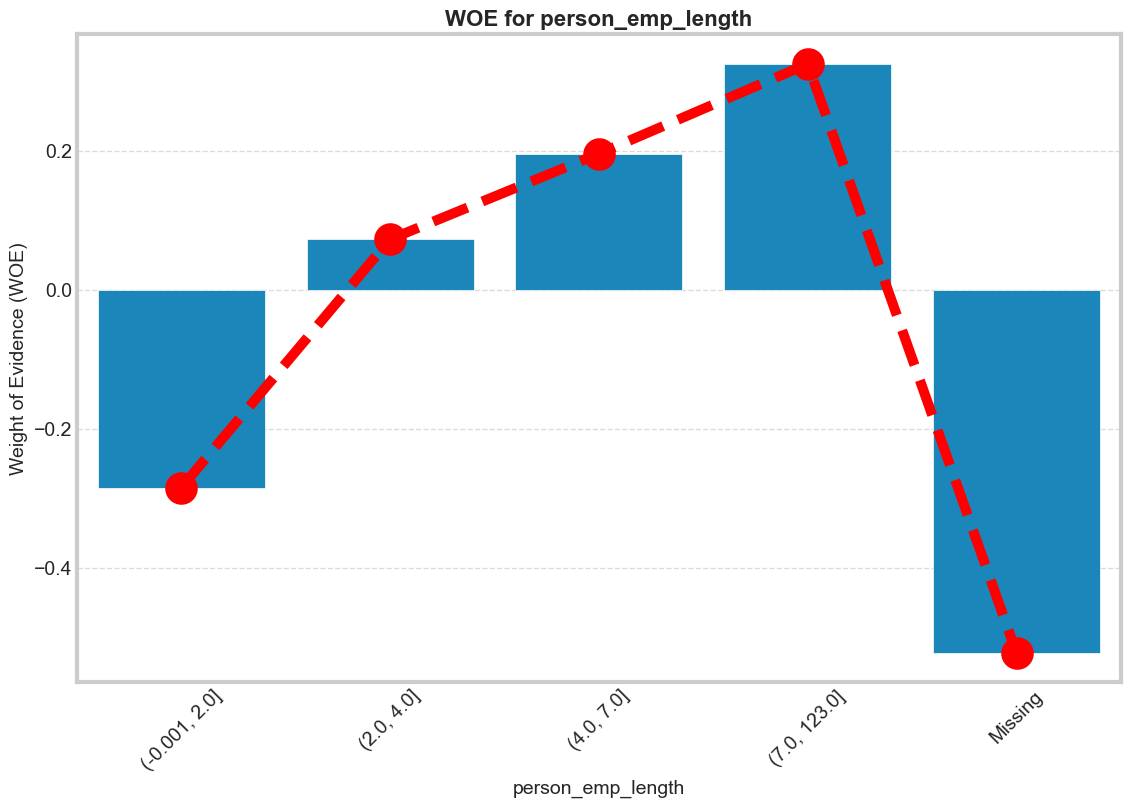

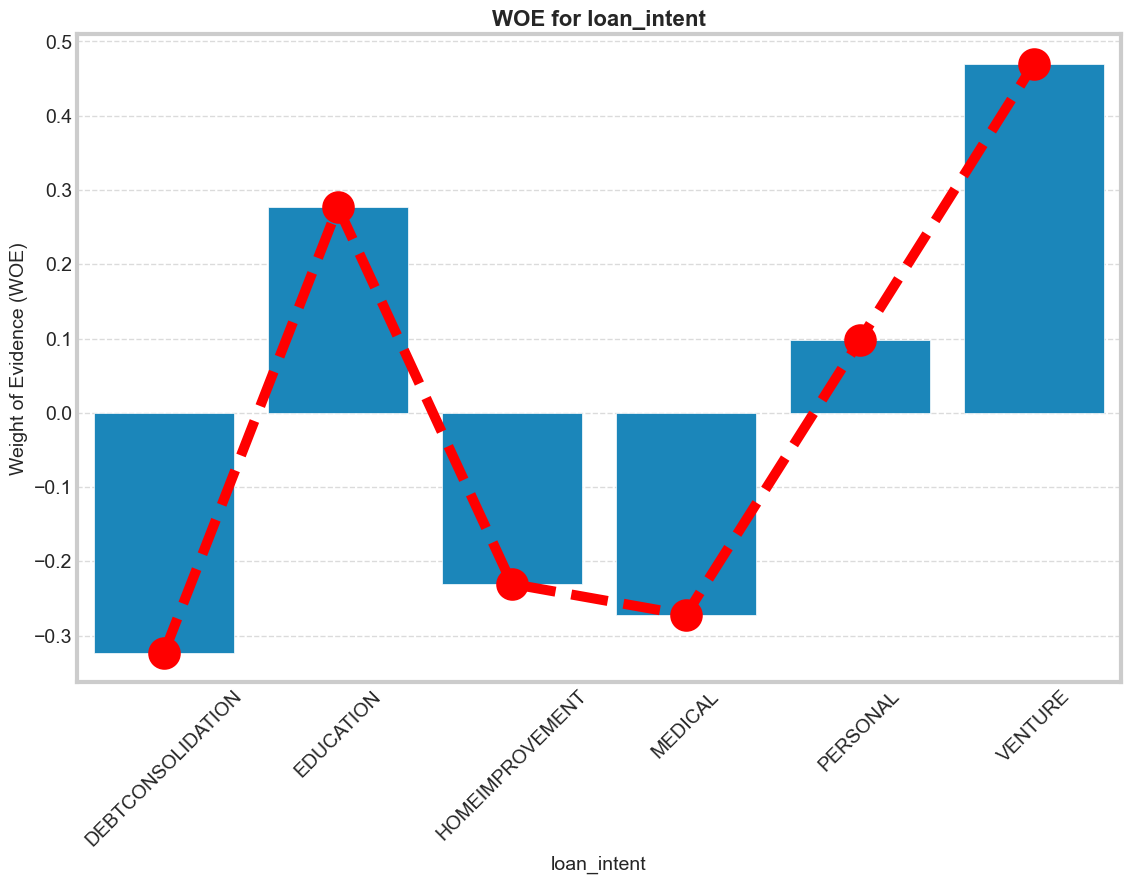

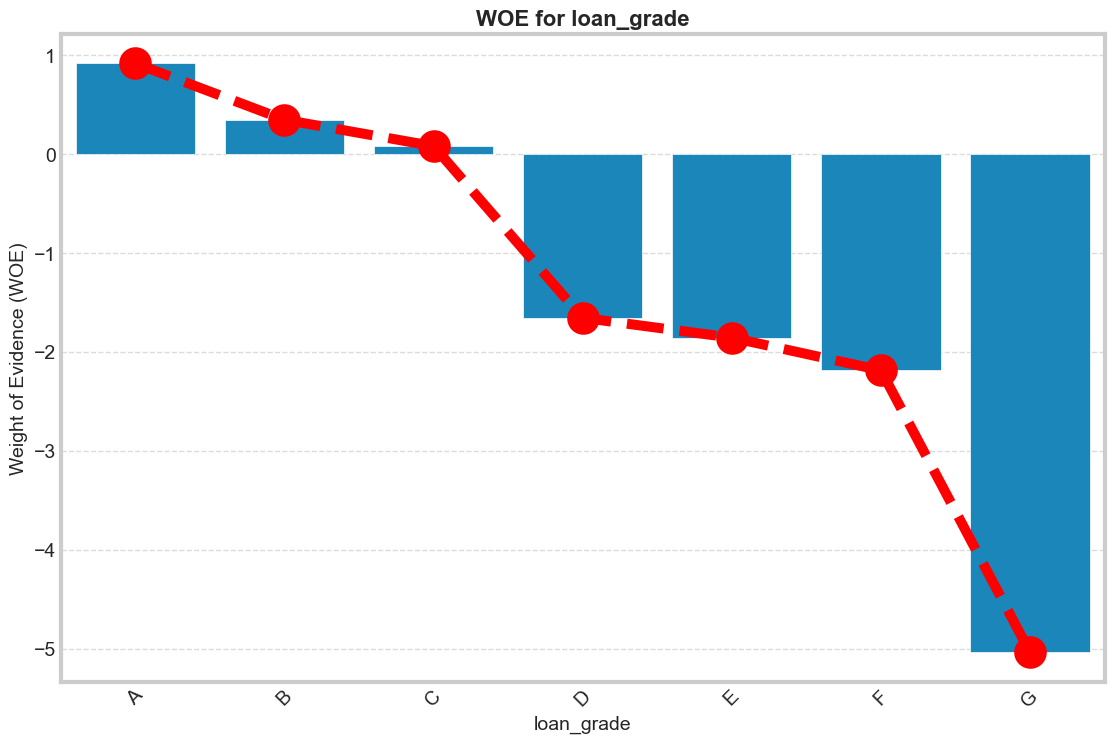

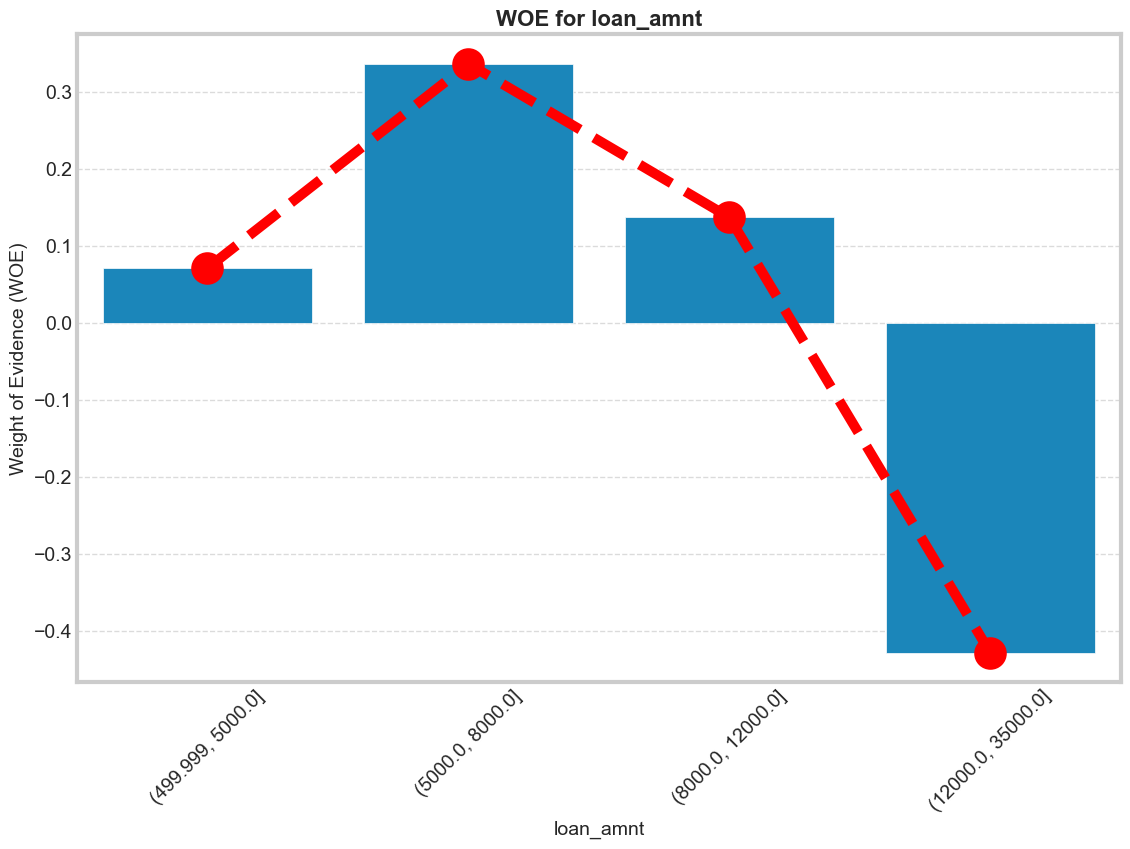

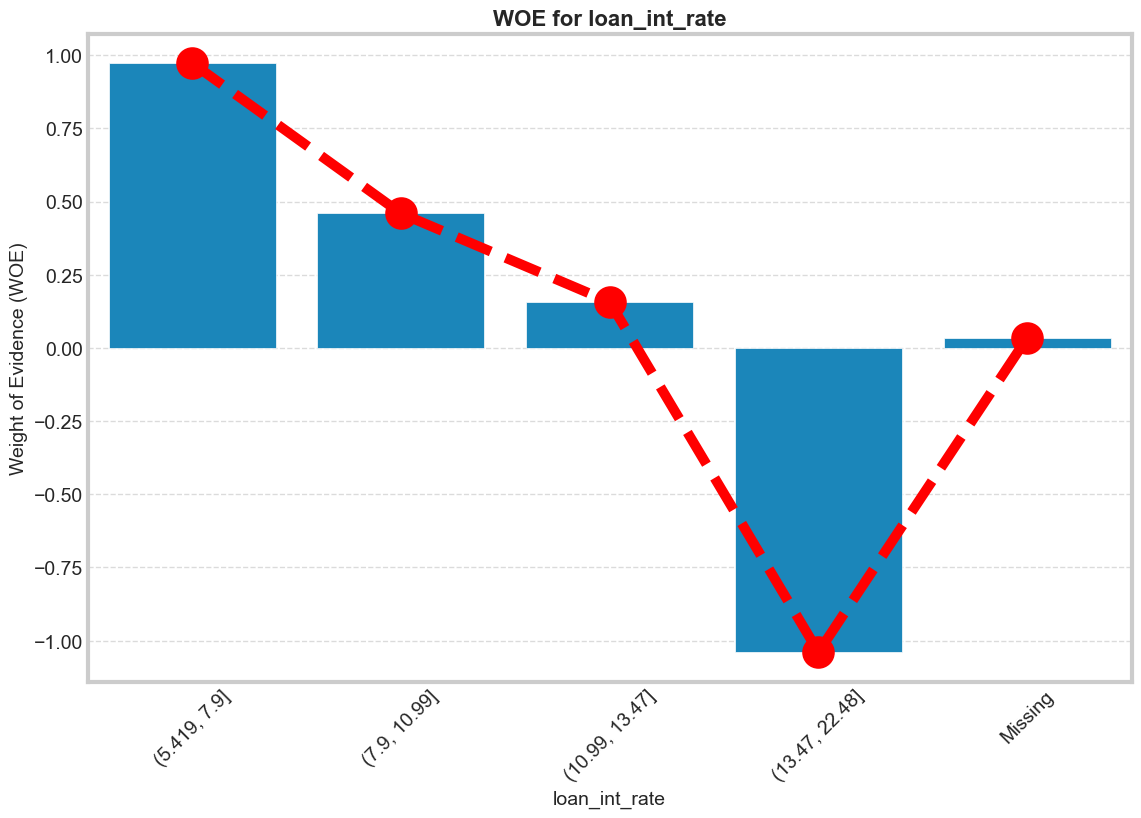

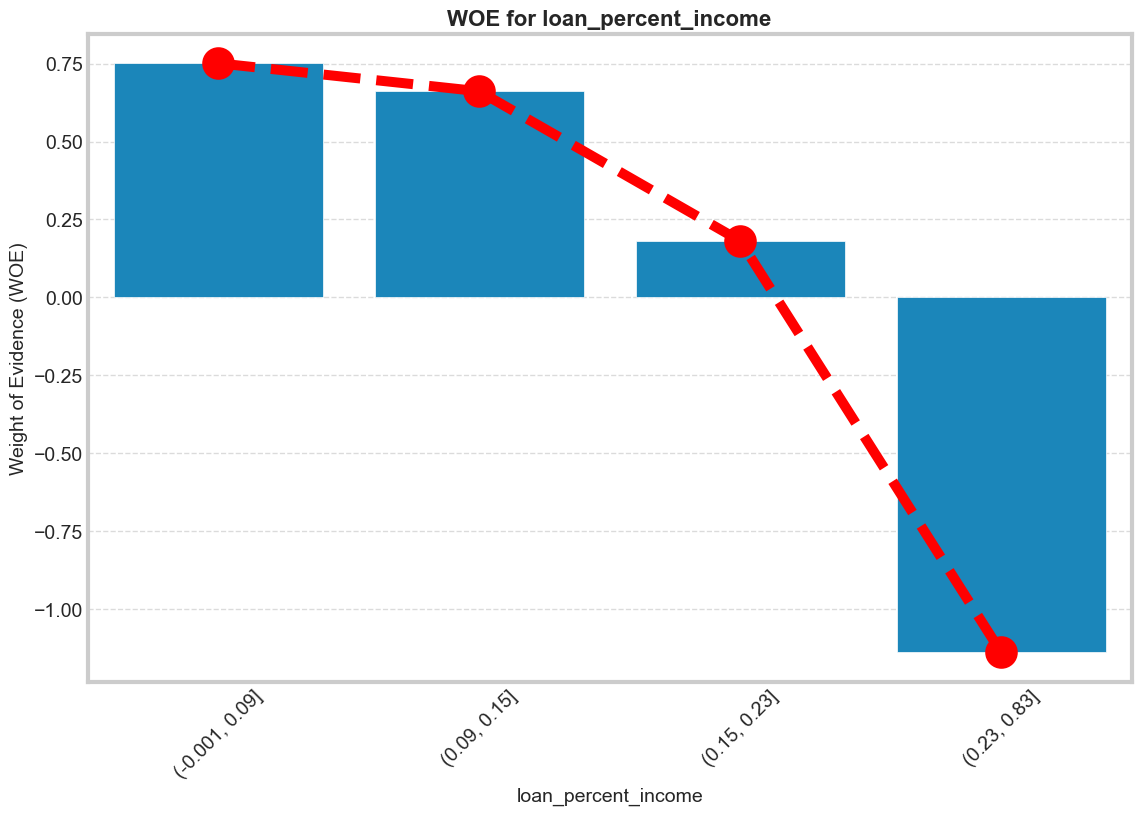

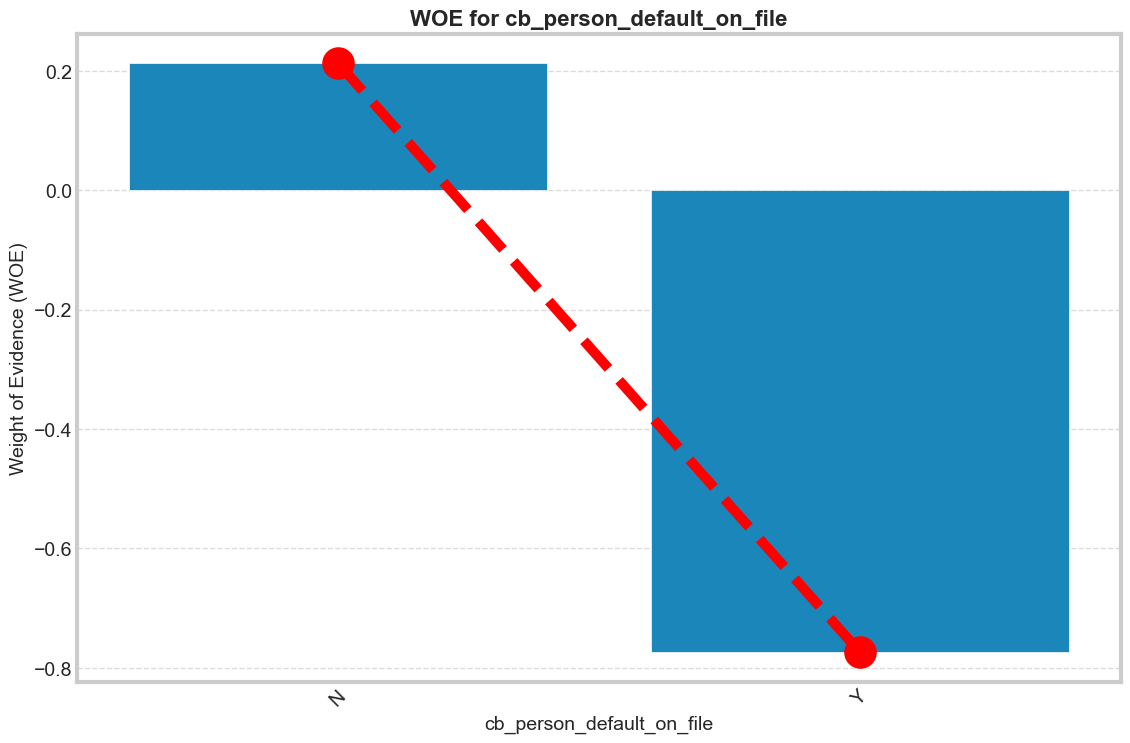

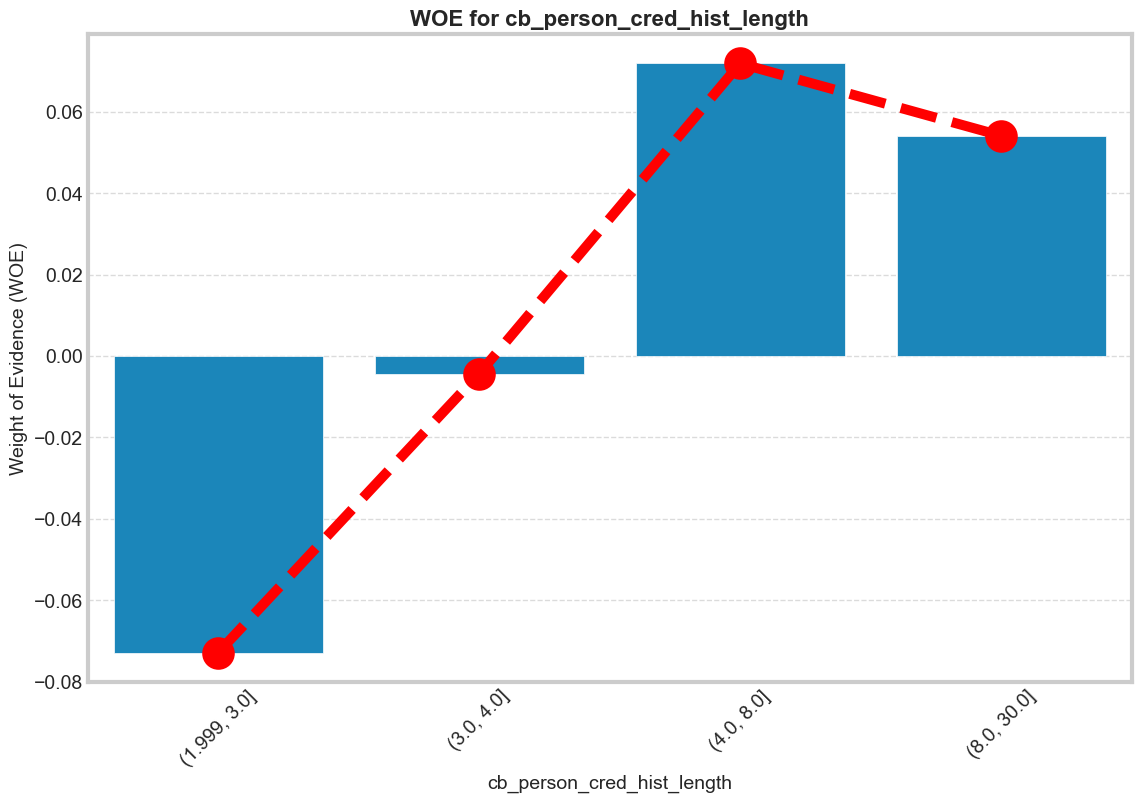

In [11]:
feature_names = WOE_df["Feature"].unique()
for feature in feature_names:
    filtered_WOE_df = WOE_df[WOE_df['Feature'] == feature]

    # Define the plot size and title
    plt.figure(figsize=(12, 8))
    plt.title(f'WOE for {feature}', fontsize=16, fontweight='bold')

    # Plot the WOE using barplot for better visualization
    barplot = sns.barplot(x='Feature Value', y='WoE', data=filtered_WOE_df)
    pointplot = sns.pointplot(x='Feature Value', y='WoE', data=filtered_WOE_df, linestyles='--', color="red", markers="o")
    
    # Rotate the label of x-axis for better readability
    plt.xticks(rotation=45)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Weight of Evidence (WOE)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


## 4. Replace the Feature Values with WoE

In [12]:
feature_names = WOE_df["Feature"].unique()
woe_dict_map = {}

for feature_name in feature_names:
    filtered_WOE_df = WOE_df[WOE_df["Feature"] == feature_name]
    woe_dict_map[feature_name] = filtered_WOE_df.set_index("Feature Value")["WoE"].to_dict()

c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [13]:
train_woe = train.copy()

def add_woe(value, woe_dict_map):
    woe_value = None
    if pd.isna(value):
        woe_value = woe_dict_map.get("Missing", None)
    else:
        for interval, woe in woe_dict_map.items():
            if isinstance(interval, pd.Interval) and value in interval:
                woe_value = woe
    return woe_value

# train
for col in train_woe.select_dtypes("number").columns:
    if col != "loan_status":
        train_woe[col] = train_woe[col].apply(lambda x: add_woe(x, woe_dict_map[col]))
        train_woe[col] = train_woe[col].fillna(woe_dict_map[col].get("Missing", np.nan))

for col in train_woe.select_dtypes("object").columns:
    if col != "loan_status":
        train_woe[col] = train_woe[col].map(woe_dict_map[col])
        train_woe[col] = train_woe[col].fillna(woe_dict_map[col].get("Missing", np.nan))

        
# test
test_woe = test.copy()
for col in test_woe.select_dtypes("number").columns:
    if col != "loan_status":
        test_woe[col] = test_woe[col].apply(lambda x: add_woe(x, woe_dict_map[col]))
        test_woe[col] = test_woe[col].fillna(woe_dict_map[col].get("Missing", np.nan))


for col in test_woe.select_dtypes("object").columns:
    if col != "loan_status":
        test_woe[col] = test_woe[col].map(woe_dict_map[col])
        test_woe[col] = test_woe[col].fillna(woe_dict_map[col].get("Missing", np.nan))

# Feature Selection

1. Prepare all features
2. Loop all features start from 1 and adding it up and calculate the cross validation score
3. Document it

In [14]:
# Recursive Feature Elimination (RFE)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve, auc

def forward_feature_selection(X_train, y_train, scoring='roc_auc', cv=5):
    features = X_train.columns
    predictors_list = []
    score_list = []
    predictors = []

    for feature in features:
        predictors = predictors + [feature]

        X = X_train.loc[:, predictors]
        y = y_train

        # Create model
        model = LogisticRegression(penalty=None, class_weight="balanced", random_state=42)
        
        # Perform cross-validation and get the average score
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        avg_score = np.mean(scores)
        
        # Document the predictors and average score
        predictors_list.append(predictors)
        score_list.append(avg_score)


    return pd.DataFrame({
        "Predictors": predictors_list,
        "Score": score_list
    })

In [15]:
X_train, y_train = train_woe.drop(columns=["loan_status"]), train_woe["loan_status"]
ffs_df = forward_feature_selection(X_train, y_train, scoring='recall', cv=5)
ffs_df

Predictors     Score
0                                        [person_age]  0.296518
1                         [person_age, person_income]  0.456030
2   [person_age, person_income, person_home_owners...  0.739534
3   [person_age, person_income, person_home_owners...  0.739534
4   [person_age, person_income, person_home_owners...  0.670239
5   [person_age, person_income, person_home_owners...  0.741121
6   [person_age, person_income, person_home_owners...  0.778932
7   [person_age, person_income, person_home_owners...  0.778756
8   [person_age, person_income, person_home_owners...  0.802324
9   [person_age, person_income, person_home_owners...  0.802148
10  [person_age, person_income, person_home_owners...  0.801796

In [16]:
best_model = ffs_df.iloc[ffs_df["Score"].argmax()]
selected_features = best_model["Predictors"]
selected_features

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']

# Modelling

In [17]:
model = LogisticRegression(penalty=None, class_weight="balanced", random_state=42)
X_train, y_train = train_woe.drop(columns=["loan_status"]), train_woe["loan_status"]
selected_features = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_grade',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income'
]
model.fit(X_train[selected_features], y_train)

LogisticRegression(class_weight='balanced', penalty=None, random_state=42)

In [18]:
print("Intercept: ", model.intercept_[0])

print("Coef:")
for feature, coef in zip(selected_features, model.coef_.reshape(-1)):
    print(f"{feature} = {coef:.5f}")

Intercept:  -0.061527239427528295
Coef:
person_age = -0.35705
person_income = -0.96821
person_home_ownership = -0.75169
person_emp_length = -0.25322
loan_intent = -1.26280
loan_grade = -1.15056
loan_amnt = -0.84265
loan_int_rate = 0.00422
loan_percent_income = -0.77162


In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from scipy import stats

def plot_predict_proba(y_pred_proba: np.array, y_true: np.array) -> None:
    # Create a figure and axis object
    plt.figure(figsize=(8, 5))

    # Plot histograms for the predicted probabilities
    sns.histplot(y_pred_proba[y_true == 0], label="Not Default", kde=True, color='blue', alpha=0.6, bins=30)
    sns.histplot(y_pred_proba[y_true == 1], label="Default", kde=True, color='red', alpha=0.6, bins=30)

    # Add title and axis labels
    plt.title('Predicted Probability Distributions for Default and Not Default', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Probability', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add legend
    plt.legend(title='Label', fontsize=12, title_fontsize='13')

    # Show grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_roc_auc_curve(y_pred_proba: np.array, y_true: np.array) -> None:
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line

    # Title and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)

    # Add legend
    plt.legend(loc="lower right", fontsize=12)

    # Show grid for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

def plot_precision_recall_curve(y_pred_proba: np.array, y_true: np.array) -> None:
    # Compute Precision-Recall curve and average precision score
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    average_precision = average_precision_score(y_true, y_pred_proba)

    # Plotting the Precision-Recall curve
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {average_precision:.2f})')

    # Title and labels
    plt.title('Precision-Recall Curve', fontsize=16, fontweight='bold')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)

    # Add legend
    plt.legend(loc="lower left", fontsize=12)

    # Show grid for better readability
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


def plot_ks(y_pred_proba: np.array, y_true: np.array) -> None:
    # Generate two sample distributions
    y_pred_proba_not_default = y_pred_proba[y_true == 0]
    y_pred_proba_default = y_pred_proba[y_true == 1]

    # Calculate the KS statistic
    ks_stat, p_value = stats.ks_2samp(y_pred_proba_not_default, y_pred_proba_default)

    # Plot the CDFs
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_proba_not_default, bins=50, density=True, histtype='step', cumulative=True, label='Not Default', linewidth=2)
    plt.hist(y_pred_proba_default, bins=50, density=True, histtype='step', cumulative=True, label='Default', linewidth=2)
    plt.axvline(ks_stat, linestyle="--", linewidth=2, color="black")
    plt.title('KS Plot')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend(title=f'KS Statistic: {ks_stat:.3f}, P-value: {p_value:.3f}')
    plt.show()

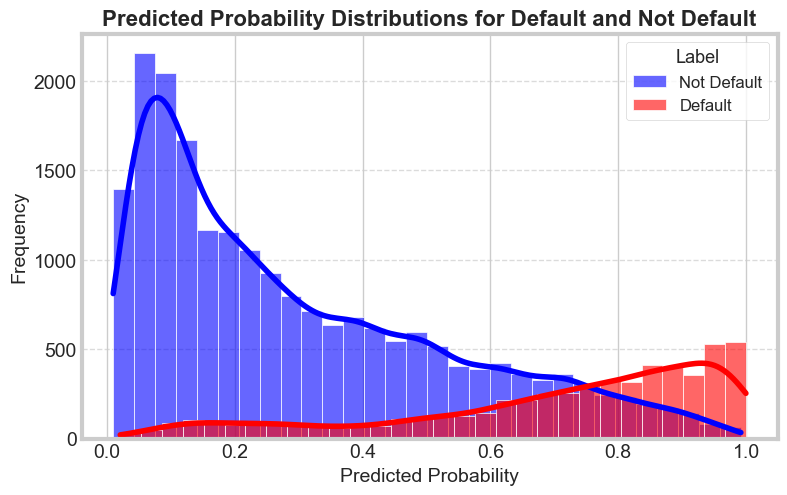

In [20]:
y_pred_proba = model.predict_proba(X_train[selected_features])[:, -1]
plot_predict_proba(y_pred_proba, y_train)

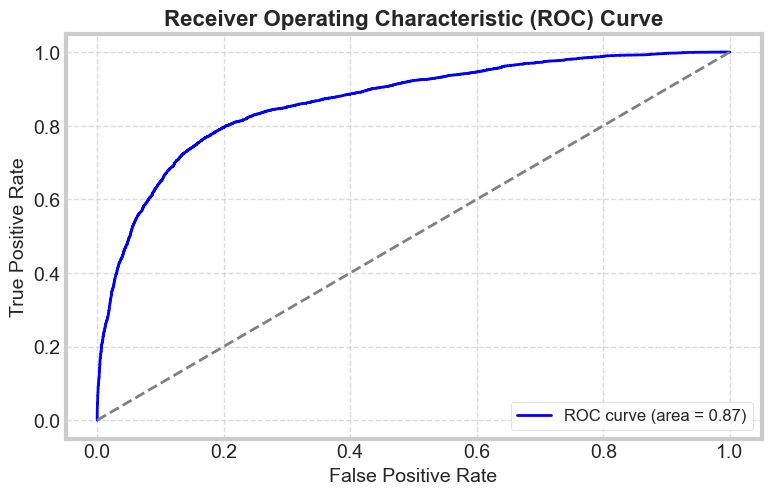

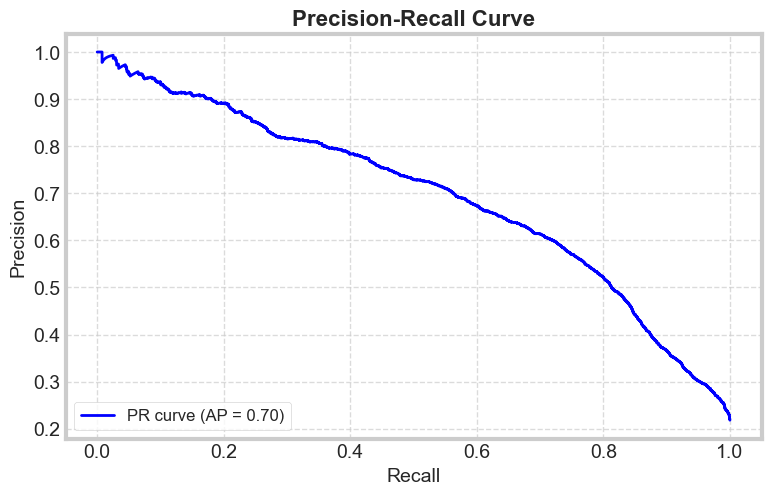

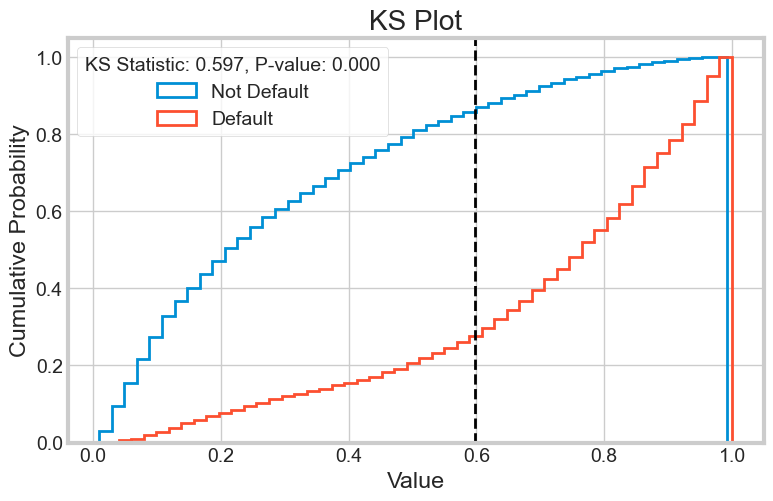

In [21]:
y_pred_proba = model.predict_proba(X_train[selected_features])[:, -1]
plot_roc_auc_curve(y_pred_proba, y_train)
plot_precision_recall_curve(y_pred_proba, y_train)
plot_ks(y_pred_proba, y_train)

# Evaluate on Testing Data

In [22]:
X_test, y_test = test_woe.drop(columns=["loan_status"]), test_woe["loan_status"]
y_pred_proba = model.predict_proba(X_test[selected_features])[:, -1]

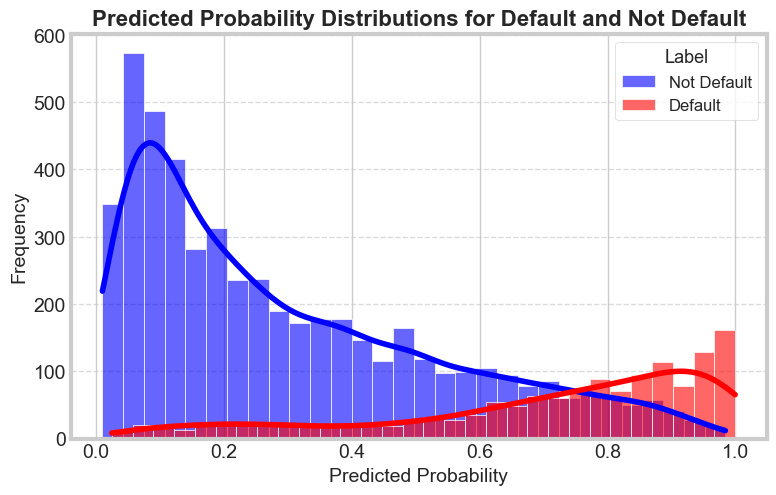

In [23]:
plot_predict_proba(y_pred_proba, y_test)

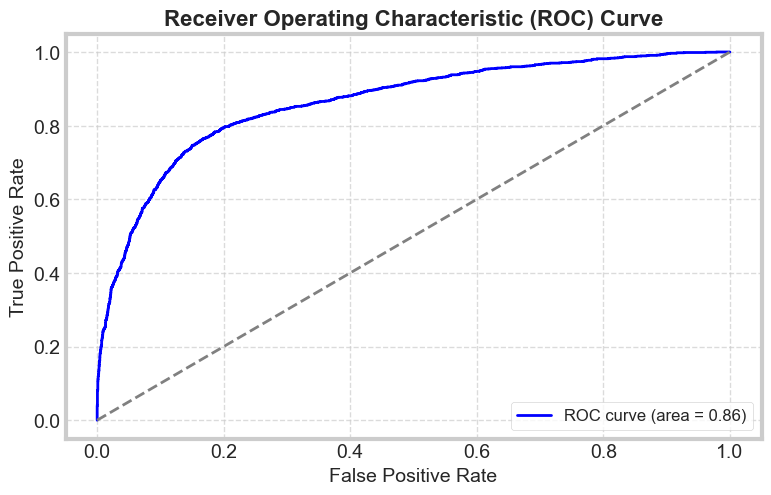

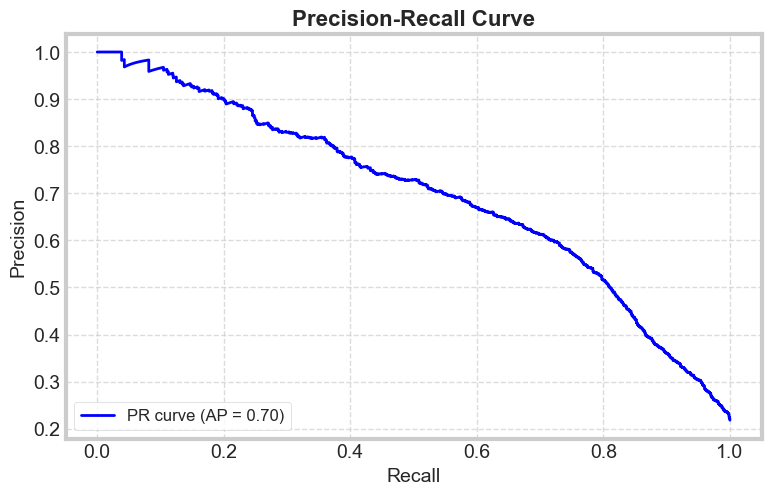

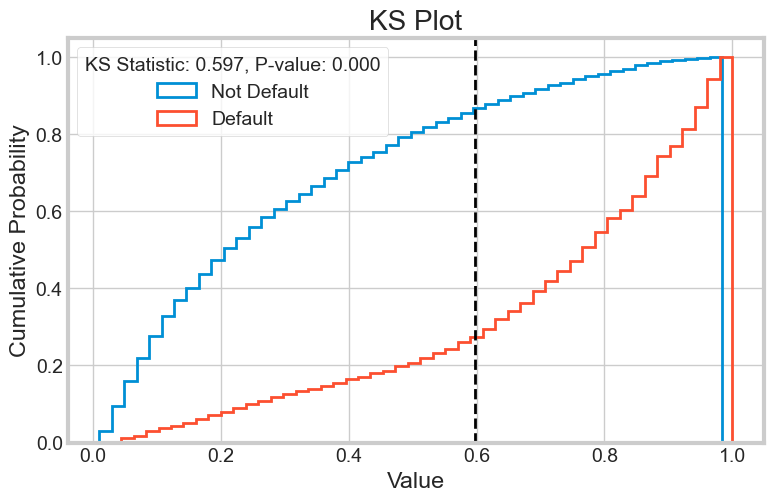

In [24]:
plot_roc_auc_curve(y_pred_proba, y_test)
plot_precision_recall_curve(y_pred_proba, y_test)
plot_ks(y_pred_proba, y_test)

# Transform into Scorecard
base_score = 1000, base_odds = 35 , pdo = 80, rate = 2

In [25]:
# Define Factor and Offset
factor = 80/np.log(2)
offset = 1000 - factor*np.log(35)

print(f"Offset = {offset:.2f}")
print(f"Factor = {factor:.2f}")

Offset = 589.66
Factor = 115.42


In [26]:
# Define n = number of characteristics
n = len(selected_features)

# Define b0
b0 = model.intercept_[0]

print(f"n = {n}")
print(f"b0 = {b0:.4f}")

n = 9
b0 = -0.0615


In [27]:
model_summary = pd.DataFrame({
    "Feature": selected_features,
    "Estimate": model.coef_.reshape(-1)
})

scorecards = pd.merge(
    right = WOE_df, 
    left = model_summary,
    how = "left",
    on = ["Feature"]
)

scorecards

Feature  Estimate         Feature Value       WoE
0              person_age -0.357048        (19.999, 23.0] -0.121524
1              person_age -0.357048          (23.0, 26.0]  0.020734
2              person_age -0.357048          (26.0, 30.0]  0.069583
3              person_age -0.357048         (30.0, 144.0]  0.058225
4           person_income -0.968212  (3999.999, 38443.25] -0.862408
5           person_income -0.968212   (38443.25, 55000.0]  0.029862
6           person_income -0.968212    (55000.0, 79000.0]  0.319293
7           person_income -0.968212  (79000.0, 6000000.0]  1.009499
8   person_home_ownership -0.751689              MORTGAGE  0.679659
9   person_home_ownership -0.751689                 OTHER -0.549400
10  person_home_ownership -0.751689                   OWN  1.262009
11  person_home_ownership -0.751689                  RENT -0.507538
12      person_emp_length -0.253224         (-0.001, 2.0] -0.283750
13      person_emp_length -0.253224            (2.0, 4.0]  0.073195
14      person_emp_length -0.253224            (4.0, 7.0]  0.196157
15      person_emp_length -0.253224          (7.0, 123.0]  0.325354
16      person_emp_length -0.253224               Missing -0.521681
17            loan_intent -1.262798     DEBTCONSOLIDATION -0.323396
18            loan_intent -1.262798             EDUCATION  0.277027
19            loan_intent -1.262798       HOMEIMPROVEMENT -0.230444
20            loan_intent -1.262798               MEDICAL -0.272080
21            loan_intent -1.262798              PERSONAL  0.097897
22            loan_intent -1.262798               VENTURE  0.469865
23             loan_grade -1.150564                     A  0.918329
24             loan_grade -1.150564                     B  0.348345
25             loan_grade -1.150564                     C  0.081888
26             loan_grade -1.150564                     D -1.654452
27             loan_grade -1.150564                     E -1.854967
28             loan_grade -1.150564                     F -2.185571
29             loan_grade -1.150564                     G -5.037649
30              loan_amnt -0.842653     (499.999, 5000.0]  0.070919
31              loan_amnt -0.842653      (5000.0, 8000.0]  0.336055
32              loan_amnt -0.842653     (8000.0, 12000.0]  0.136723
33              loan_amnt -0.842653    (12000.0, 35000.0] -0.428565
34          loan_int_rate  0.004219          (5.419, 7.9]  0.973236
35          loan_int_rate  0.004219          (7.9, 10.99]  0.459663
36          loan_int_rate  0.004219        (10.99, 13.47]  0.156835
37          loan_int_rate  0.004219        (13.47, 22.48] -1.039311
38          loan_int_rate  0.004219               Missing  0.034578
39    loan_percent_income -0.771619        (-0.001, 0.09]  0.751099
40    loan_percent_income -0.771619          (0.09, 0.15]  0.661309
41    loan_percent_income -0.771619          (0.15, 0.23]  0.181253
42    loan_percent_income -0.771619          (0.23, 0.83] -1.139158

In [28]:
# Define beta and WOE
beta = scorecards['Estimate']
WOE = scorecards['WoE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))
scorecards['Points'] = scorecards['Points'].astype('int')

scorecards = scorecards.sort_values(by=["Feature", "Points"])

In [30]:
scorecards

Feature  Estimate         Feature Value       WoE  Points
33              loan_amnt -0.842653    (12000.0, 35000.0] -0.428565      24
30              loan_amnt -0.842653     (499.999, 5000.0]  0.070919      73
32              loan_amnt -0.842653     (8000.0, 12000.0]  0.136723      79
31              loan_amnt -0.842653      (5000.0, 8000.0]  0.336055      98
29             loan_grade -1.150564                     G -5.037649    -602
28             loan_grade -1.150564                     F -2.185571    -223
27             loan_grade -1.150564                     E -1.854967    -180
26             loan_grade -1.150564                     D -1.654452    -153
25             loan_grade -1.150564                     C  0.081888      77
24             loan_grade -1.150564                     B  0.348345     112
23             loan_grade -1.150564                     A  0.918329     188
34          loan_int_rate  0.004219          (5.419, 7.9]  0.973236      65
35          loan_int_rate  0.004219          (7.9, 10.99]  0.459663      66
36          loan_int_rate  0.004219        (10.99, 13.47]  0.156835      66
37          loan_int_rate  0.004219        (13.47, 22.48] -1.039311      66
38          loan_int_rate  0.004219               Missing  0.034578      66
17            loan_intent -1.262798     DEBTCONSOLIDATION -0.323396      19
20            loan_intent -1.262798               MEDICAL -0.272080      26
19            loan_intent -1.262798       HOMEIMPROVEMENT -0.230444      32
21            loan_intent -1.262798              PERSONAL  0.097897      80
18            loan_intent -1.262798             EDUCATION  0.277027     106
22            loan_intent -1.262798               VENTURE  0.469865     134
42    loan_percent_income -0.771619          (0.23, 0.83] -1.139158     -35
41    loan_percent_income -0.771619          (0.15, 0.23]  0.181253      82
40    loan_percent_income -0.771619          (0.09, 0.15]  0.661309     125
39    loan_percent_income -0.771619        (-0.001, 0.09]  0.751099     133
0              person_age -0.357048        (19.999, 23.0] -0.121524      61
1              person_age -0.357048          (23.0, 26.0]  0.020734      67
3              person_age -0.357048         (30.0, 144.0]  0.058225      68
2              person_age -0.357048          (26.0, 30.0]  0.069583      69
16      person_emp_length -0.253224               Missing -0.521681      51
12      person_emp_length -0.253224         (-0.001, 2.0] -0.283750      58
13      person_emp_length -0.253224            (2.0, 4.0]  0.073195      68
14      person_emp_length -0.253224            (4.0, 7.0]  0.196157      72
15      person_emp_length -0.253224          (7.0, 123.0]  0.325354      75
9   person_home_ownership -0.751689                 OTHER -0.549400      18
11  person_home_ownership -0.751689                  RENT -0.507538      22
8   person_home_ownership -0.751689              MORTGAGE  0.679659     125
10  person_home_ownership -0.751689                   OWN  1.262009     175
4           person_income -0.968212  (3999.999, 38443.25] -0.862408     -30
5           person_income -0.968212   (38443.25, 55000.0]  0.029862      69
6           person_income -0.968212    (55000.0, 79000.0]  0.319293     101
7           person_income -0.968212  (79000.0, 6000000.0]  1.009499     179

Credit score cards is useful for intepretability in operations of assessing creditworthines of an applicant.

In [32]:
# Create scorecard mapping
scorecard_features = scorecards["Feature"].unique()
scorecard_map_dict = {}

for feature in scorecard_features:
    scorecard_map_dict[feature] = scorecards[scorecards["Feature"]==feature].set_index("Feature Value")["Points"].to_dict()

In [33]:
# Function used to convert customer characteristics into credit points
def value_to_credit_points(value, scorecard_map_dict):
    credit_points = None
    if pd.isna(value):
        credit_points = scorecard_map_dict.get("Missing", None)
    else:
        for interval, woe in scorecard_map_dict.items():
            if isinstance(interval, pd.Interval) and value in interval:
                credit_points = woe
    return credit_points

In [34]:
# Prepare input
input_df = df.sample(5)
credit_scores_df = pd.DataFrame({})
# train
for col in input_df.select_dtypes("number").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].apply(lambda x: value_to_credit_points(x, scorecard_map_dict[col]))
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

for col in input_df.select_dtypes("object").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].map(scorecard_map_dict[col])
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

credit_scores_df["credit_score"] = credit_scores_df.sum(axis=1)

In [35]:
levels_decriptions = {
    0: "Blacklist",
    1: "High Risk",
    2: "Medium Risk",
    3: "Moderate Risk",
    4: "Low Risk",
    5: "Normal Credit",
    6: "Good Credit",
    7: "Excellent Credit",
    8: "Perfect Credit"
}

def get_credit_levels(
    df: pd.DataFrame,
    target_col: str = "credit_score",
    left_bound = -100,
    level_0 = 100,
    level_1 = 200,
    level_2 = 250,
    level_3 = 300,
    level_4 = 350,
    level_5 = 400,
    level_6 = 450,
    level_7 = 500,
    level_8 = 800
):
    levels = []
    conditions = [
        (df[target_col] > left_bound) & (df[target_col] <= level_0),
        (df[target_col] > level_0) & (df[target_col] <= level_1),
        (df[target_col] > level_1) & (df[target_col] <= level_2),
        (df[target_col] > level_2) & (df[target_col] <= level_3),
        (df[target_col] > level_3) & (df[target_col] <= level_4),
        (df[target_col] > level_4) & (df[target_col] <= level_5),
        (df[target_col] > level_5) & (df[target_col] <= level_6),
        (df[target_col] > level_6) & (df[target_col] <= level_7),
        (df[target_col] > level_7) & (df[target_col] <= level_8)
    ]

    level_choices = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    lower_bound_choices = [left_bound, level_0, level_1, level_2, level_3, level_4, level_5, level_6, level_7]
    upper_bound_choices = [level_0, level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8]
    df["credit_level"] = np.select(conditions, level_choices)
    df["credit_lower_bound"] = np.select(conditions, lower_bound_choices)
    df["credit_upper_bound"] = np.select(conditions, upper_bound_choices)
    return df

## Present Results to User/ Management

In [36]:
# Create scorecard mapping
scorecard_features = scorecards["Feature"].unique()
scorecard_map_dict = {}

for feature in scorecard_features:
    scorecard_map_dict[feature] = scorecards[scorecards["Feature"]==feature].set_index("Feature Value")["Points"].to_dict()

c:\Users\923006079\AppData\Local\anaconda3\envs\credit-risk-modelling\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [37]:
# Function used to convert customer characteristics into credit points
def value_to_credit_points(value, scorecard_map_dict):
    credit_points = None
    if pd.isna(value):
        credit_points = scorecard_map_dict.get("Missing", None)
    else:
        for interval, woe in scorecard_map_dict.items():
            if isinstance(interval, pd.Interval) and value in interval:
                credit_points = woe
    return credit_points

In [38]:
# Prepare input
input_df = test.copy()
credit_scores_df = pd.DataFrame({})
# train
for col in input_df.select_dtypes("number").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].apply(lambda x: value_to_credit_points(x, scorecard_map_dict[col]))
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

for col in input_df.select_dtypes("object").columns:
    if col in scorecard_features:
        credit_scores_df[col+"_value"] = input_df[col].map(scorecard_map_dict[col])
        credit_scores_df[col+"_value"] = credit_scores_df[col+"_value"].fillna(scorecard_map_dict[col].get("Missing", np.nan))

credit_scores_df["credit_score"] = credit_scores_df.sum(axis=1)
credit_scores_df["credit_score"] = credit_scores_df["credit_score"].apply(lambda x: 1000 if x > 1000 else x)

In [39]:
credit_scores_df = get_credit_levels(credit_scores_df,
    target_col ='credit_score',
    left_bound = -1000,
    level_0 = 250,
    level_1 = 300,
    level_2 = 400,
    level_3 = 500,
    level_4 = 580,
    level_5 = 630,
    level_6 = 690,
    level_7 = 730,
    level_8 = 1000
)
credit_scores_df["credit_description"] = credit_scores_df["credit_level"].map(levels_decriptions)

In [40]:
report_df = credit_scores_df[["credit_score", "credit_level", "credit_lower_bound", "credit_upper_bound"]]
report_df["credit_description"] = report_df["credit_level"].map(levels_decriptions)
report_df["loan_status"] = test["loan_status"].values

C:\Users\923006079\AppData\Local\Temp\ipykernel_11136\672461742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df["credit_description"] = report_df["credit_level"].map(levels_decriptions)
C:\Users\923006079\AppData\Local\Temp\ipykernel_11136\672461742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df["loan_status"] = test["loan_status"].values


In [41]:
report_agg_df = report_df\
    .groupby(["credit_level", "credit_lower_bound", "credit_upper_bound", "credit_description"])["loan_status"]\
    .value_counts()\
    .unstack()\
    .reset_index()\
    .rename(columns={
        0: "Not Default",
        1: "Default"
    })
report_agg_df = report_agg_df.rename_axis(None, axis=1)
report_agg_df["Customers"] = report_agg_df["Not Default"] + report_agg_df["Default"]
report_agg_df["Customers Rate"] = report_agg_df["Customers"] / report_agg_df["Customers"].sum() * 100
report_agg_df["Default Rate"] = report_agg_df["Default"] / report_agg_df["Customers"] * 100
report_agg_df = report_agg_df[[
    "credit_level", "credit_lower_bound", "credit_upper_bound", 
    "credit_description", "Customers", "Customers Rate", 
    "Not Default", "Default", "Default Rate"]]\
    .rename(columns={
        "Not Default": "Good Customers", 
        "Default": "Bad Customers",
    })
report_agg_df["Reverse Cumulative Customers"] = report_agg_df["Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Good Customers"] = report_agg_df["Good Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Bad Customers"] = report_agg_df["Bad Customers"][::-1].cumsum()
report_agg_df["Good Customers Coverage"] = report_agg_df["Reverse Cumulative Good Customers"] / report_agg_df["Good Customers"].sum()
report_agg_df["Loss Coverage"] = report_agg_df["Reverse Cumulative Bad Customers"] / report_agg_df["Reverse Cumulative Customers"]

With this, the management can perform calculation based on the risk they willing to take. For, example they wanted to cover at least **80% of Good Customers** and keeping **percentage of default below 10%**

In [43]:
report_agg_df[[
    "credit_level", "credit_lower_bound", "credit_upper_bound", 
    "credit_description", "Customers", "Customers Rate", 
    "Good Customers", "Bad Customers", "Default Rate",
    "Good Customers Coverage", "Loss Coverage"
]]

credit_level  credit_lower_bound  credit_upper_bound credit_description  \
0             0               -1000                 250          Blacklist   
1             1                 250                 300          High Risk   
2             2                 300                 400        Medium Risk   
3             3                 400                 500      Moderate Risk   
4             4                 500                 580           Low Risk   
5             5                 580                 630      Normal Credit   
6             6                 630                 690        Good Credit   
7             7                 690                 730   Excellent Credit   
8             8                 730                1000     Perfect Credit   

   Customers  Customers Rate  Good Customers  Bad Customers  Default Rate  \
0        251        3.851465              21            230     91.633466   
1        113        1.733927              21             92     81.415929   
2        391        5.999693             133            258     65.984655   
3        677       10.388215             333            344     50.812408   
4        688       10.557005             487            201     29.215116   
5        541        8.301366             468             73     13.493530   
6        686       10.526316             625             61      8.892128   
7        504        7.733620             456             48      9.523810   
8       2666       40.908393            2551            115      4.313578   

   Good Customers Coverage  Loss Coverage  
0                 1.000000       0.218199  
1                 0.995878       0.190233  
2                 0.991757       0.178775  
3                 0.965653       0.146130  
4                 0.900294       0.097935  
5                 0.804711       0.067546  
6                 0.712856       0.058091  
7                 0.590186       0.051420  
8                 0.500687       0.043136

## Explanation
1. Based on the Coverage Table, it would be a great idea to accept those who has **credit level of 6 to 8** to cover at least 80% of Good Customers, but the the consequence of accepting level 6 and above is the loss of almost **6.8%** of the accepted applicant.
2. Turns out you can push the limits with accepting those with at least has a **credit level of 5**/ categorize as `Low Risk` customers with the loss of **9.8%** of the accepted applicant.